# 📊 ACE Superstore Sales Analysis
**Business Intelligence Report**  
**Date:** July 6, 2025  
**Prepared by:** Janvier Iyakaremye

---

## 🎯 Objective
This notebook provides comprehensive analysis of ACE Superstore sales data to support executive decision-making and strategic planning. The analysis covers regional performance, product insights, customer behavior, and profitability metrics.

## 📋 Analysis Requirements
- ✅ Regional & segment sales analysis
- ✅ Top 5 best-selling and underperforming products
- ✅ Product category margin analysis  
- ✅ Online vs In-Store performance comparison
- ✅ Interactive visualizations
- ✅ Strategic recommendations

In [193]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime

# Configure display settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ All libraries imported successfully!")
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ All libraries imported successfully!
📅 Analysis Date: 2025-07-06 20:06:07


## 📂 Load and Explore Data
Loading the ACE Superstore sales dataset and store locations data to begin our analysis.

In [194]:
# Load datasets with proper encoding handling
def load_data():
    """Load and initial preprocessing of the datasets"""
    print("📥 Loading datasets...")
    
    # Load main sales data with proper encoding
    try:
        sales_df = pd.read_csv('data/Ace-Superstore-Retail-Dataset.csv', encoding='utf-8')
        print("✅ Sales data loaded with UTF-8 encoding")
    except UnicodeDecodeError:
        sales_df = pd.read_csv('data/Ace-Superstore-Retail-Dataset.csv', encoding='latin1')
        print("✅ Sales data loaded with Latin1 encoding")
    
    # Load store locations data
    try:
        stores_df = pd.read_csv('data/Store-Locations.csv', encoding='utf-8')
        print("✅ Store locations loaded with UTF-8 encoding")
    except UnicodeDecodeError:
        stores_df = pd.read_csv('data/Store-Locations.csv', encoding='latin1')
        print("✅ Store locations loaded with Latin1 encoding")
    
    print(f"📊 Sales data shape: {sales_df.shape}")
    print(f"🏪 Store locations shape: {stores_df.shape}")
    
    return sales_df, stores_df



In [195]:
# Load the data
sales_df, stores_df = load_data()

# Display basic information about the datasets
print("\n📋 Sales Dataset Info:")
print(sales_df.info())
print(f"\n📋 Sales Dataset Columns: {list(sales_df.columns)}")

print("\n📋 Store Locations Dataset Info:")
print(stores_df.info())
print(f"\n📋 Store Locations Columns: {list(stores_df.columns)}")

# Preview the data
print("\n👀 First 5 rows of Sales Data:")
sales_df.head()

📥 Loading datasets...


✅ Sales data loaded with Latin1 encoding
✅ Store locations loaded with UTF-8 encoding
📊 Sales data shape: (11000, 16)
🏪 Store locations shape: (72, 4)

📋 Sales Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      11000 non-null  object 
 1   Order Date    11000 non-null  object 
 2   Order Mode    11000 non-null  object 
 3   Customer ID   11000 non-null  object 
 4   City          11000 non-null  object 
 5   Postal Code   11000 non-null  object 
 6   Country       10780 non-null  object 
 7   Region        8189 non-null   object 
 8   Product ID    11000 non-null  object 
 9   Product Name  11000 non-null  object 
 10  Category      10802 non-null  object 
 11  Sub-Category  11000 non-null  object 
 12  Sales         11000 non-null  float64
 13  Cost Price    11000 non-null  float64
 14  Quantity      11000 non-

Order ID  Order Date Order Mode Customer ID      City Postal Code  \
0  BTC-245712   6/22/2024     Online    LO028977    Norton          S8   
1  NZR-891212   3/15/2024   In-Store    OH046670  West End        DN36   
2  TDN-811093   2/29/2024     Online    FH015492   Newtown        RG20   
3  MIX-746378  10/25/2024   In-Store    ZZ015342  East End        BH21   
4  UGI-201465   8/18/2024     Online    TV075977    Seaton        LE15   

   Country           Region                  Product ID          Product Name  \
0  England              NaN  01JZ3N512GHNAJSF3HCCQ0PQYY  Flavored Popcorn Mix   
1  England  East of England  01JZ3N56DDVK7Y600QGH2M6T1X             Olive Oil   
2  England    East Midlands  01JZ3N53A64TW72TVK28SMMXKX   Children's Backpack   
3  England       North West  01JZ3N572S4RVA29Y33YRWH174  Honey Butter Popcorn   
4  England    East Midlands  01JZ3N52RT7CJNB27BFS6H8BF7      Sliced Cucumbers   

            Category          Sub-Category  Sales  Cost Price  Quantity  \
0      Food - Snacks        Gourmet Snacks   2.99       0.897         4   
1  Food - Condiments          Cooking Oils   7.99       2.397        16   
2        Accessories            Kids' Bags  29.99       8.997         2   
3      Food - Snacks        Gourmet Snacks   2.99       0.897         4   
4     Food - Produce  Fresh Cut Vegetables   1.29       0.387        11   

   Discount  
0      0.24  
1      0.32  
2      0.09  
3      0.01  
4      0.34

## 🧹 Data Cleaning and Preparation
Cleaning the data, calculating derived metrics, and preparing it for analysis.

In [196]:
# Data Cleaning and Preparation
def clean_and_prepare_data(sales_df, stores_df):
    """Clean and prepare data for analysis"""
    print("🧹 Cleaning and preparing data...")
    
    # Make a copy to avoid modifying original data
    df = sales_df.copy()
    
    # Convert date column
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    print("✅ Date column converted")
    
    # Calculate revenue (Sales - Cost)
    df['Revenue'] = df['Sales'] - df['Cost Price']
    
    # Calculate profit margin
    df['Profit Margin'] = (df['Revenue'] / df['Sales']) * 100
    
    # Calculate total revenue per order
    df['Total Revenue'] = df['Revenue'] * df['Quantity']
    
    # Calculate total sales per order
    df['Total Sales'] = df['Sales'] * df['Quantity']
    
    print("✅ Financial metrics calculated")
    
    # Merge with store locations to get proper region mapping
    df = df.merge(stores_df[['City', 'Postal Code', 'Region']], 
                 on=['City', 'Postal Code'], 
                 how='left', 
                 suffixes=('', '_store'))
    
    # Use store region where available, otherwise use original region
    df['Region_Final'] = df['Region_store'].fillna(df['Region'])
    
    print("✅ Store locations merged")
    
    # Create segments based on product categories
    def categorize_segment(category):
        if pd.notna(category):
            if category.startswith('Food'):
                return 'Food & Beverages'
            elif category in ['Home', 'Kitchen', 'Home Appliances']:
                return 'Home & Living'
            elif category in ['Health', 'Beauty', 'Grooming']:
                return 'Health & Beauty'
            elif category.startswith('Clothing'):
                return 'Fashion'
        return 'Other'
    
    df['Segment'] = df['Category'].apply(categorize_segment)
    
    print("✅ Product segments created")
    print(f"📊 Final dataset shape: {df.shape}")
    
    return df


In [197]:

# Clean and prepare the data
df = clean_and_prepare_data(sales_df, stores_df)

# Display the cleaned data structure
print("\n📊 Cleaned Dataset Summary:")
print(f"Date range: {df['Order Date'].min()} to {df['Order Date'].max()}")
print(f"Total records: {len(df):,}")
print(f"Total revenue: ${df['Total Revenue'].sum():,.2f}")

# Check for missing values
print("\n🔍 Missing Values Check:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))

# Display first few rows of cleaned data
print("\n👀 Sample of Cleaned Data:")
df.head()

🧹 Cleaning and preparing data...
✅ Date column converted
✅ Financial metrics calculated
✅ Store locations merged
✅ Product segments created
📊 Final dataset shape: (11000, 23)

📊 Cleaned Dataset Summary:
Date range: 2023-01-01 00:00:00 to 2025-03-30 00:00:00
Total records: 11,000
Total revenue: $2,126,853.54

🔍 Missing Values Check:
Region          2811
Discount         973
Region_store     571
Country          220
Category         198
Region_Final      66
dtype: int64

👀 Sample of Cleaned Data:


Order ID Order Date Order Mode Customer ID      City Postal Code  \
0  BTC-245712 2024-06-22     Online    LO028977    Norton          S8   
1  NZR-891212 2024-03-15   In-Store    OH046670  West End        DN36   
2  TDN-811093 2024-02-29     Online    FH015492   Newtown        RG20   
3  MIX-746378 2024-10-25   In-Store    ZZ015342  East End        BH21   
4  UGI-201465 2024-08-18     Online    TV075977    Seaton        LE15   

   Country           Region                  Product ID          Product Name  \
0  England              NaN  01JZ3N512GHNAJSF3HCCQ0PQYY  Flavored Popcorn Mix   
1  England  East of England  01JZ3N56DDVK7Y600QGH2M6T1X             Olive Oil   
2  England    East Midlands  01JZ3N53A64TW72TVK28SMMXKX   Children's Backpack   
3  England       North West  01JZ3N572S4RVA29Y33YRWH174  Honey Butter Popcorn   
4  England    East Midlands  01JZ3N52RT7CJNB27BFS6H8BF7      Sliced Cucumbers   

            Category          Sub-Category  Sales  Cost Price  Quantity  \
0      Food - Snacks        Gourmet Snacks   2.99       0.897         4   
1  Food - Condiments          Cooking Oils   7.99       2.397        16   
2        Accessories            Kids' Bags  29.99       8.997         2   
3      Food - Snacks        Gourmet Snacks   2.99       0.897         4   
4     Food - Produce  Fresh Cut Vegetables   1.29       0.387        11   

   Discount  Revenue  Profit Margin  Total Revenue  Total Sales  \
0      0.24    2.093           70.0          8.372        11.96   
1      0.32    5.593           70.0         89.488       127.84   
2      0.09   20.993           70.0         41.986        59.98   
3      0.01    2.093           70.0          8.372        11.96   
4      0.34    0.903           70.0          9.933        14.19   

               Region_store              Region_Final           Segment  
0  Yorkshire and the Humber  Yorkshire and the Humber  Food & Beverages  
1             East Midlands             East Midlands  Food & Beverages  
2                South East                South East             Other  
3                North West                North West  Food & Beverages  
4             East Midlands             East Midlands  Food & Beverages

## 🔍 Exploratory Data Analysis
Understanding the key metrics and characteristics of our dataset.

In [198]:

# Key Business Metrics
total_orders = len(df)
total_customers = df['Customer ID'].nunique()
total_products = df['Product ID'].nunique()
total_revenue = df['Total Revenue'].sum()
total_sales = df['Total Sales'].sum()
avg_order_value = df['Total Sales'].mean()
date_range = f"{df['Order Date'].min().strftime('%B %Y')} to {df['Order Date'].max().strftime('%B %Y')}"

print(f"📅 Analysis Period: {date_range}")
print(f"📦 Total Orders: {total_orders:,}")
print(f"👥 Unique Customers: {total_customers:,}")
print(f"🛍️ Product Portfolio: {total_products:,} products")
print(f"💰 Total Revenue: ${total_revenue:,.2f}")
print(f"💵 Total Sales: ${total_sales:,.2f}")
print(f"📊 Average Order Value: ${avg_order_value:.2f}")
print(f"💡 Revenue to Sales Ratio: {(total_revenue/total_sales)*100:.1f}%")


📅 Analysis Period: January 2023 to March 2025
📦 Total Orders: 11,000
👥 Unique Customers: 3,682
🛍️ Product Portfolio: 1,731 products
💰 Total Revenue: $2,126,853.54
💵 Total Sales: $3,170,911.82
📊 Average Order Value: $288.26
💡 Revenue to Sales Ratio: 67.1%


In [199]:

# Customer Analysis
print(f"\n👥 CUSTOMER INSIGHTS:")
orders_per_customer = total_orders / total_customers
revenue_per_customer = total_revenue / total_customers
print(f"📈 Average Orders per Customer: {orders_per_customer:.1f}")
print(f"💰 Average Revenue per Customer: ${revenue_per_customer:.2f}")




👥 CUSTOMER INSIGHTS:
📈 Average Orders per Customer: 3.0
💰 Average Revenue per Customer: $577.64


In [200]:
# Product Analysis
print(f"\n🛍️ PRODUCT INSIGHTS:")
print(f"📦 Total Categories: {df['Category'].nunique()}")
print(f"🏷️ Total Sub-categories: {df['Sub-Category'].nunique()}")
print(f"🎯 Total Segments: {df['Segment'].nunique()}")



🛍️ PRODUCT INSIGHTS:
📦 Total Categories: 133
🏷️ Total Sub-categories: 596
🎯 Total Segments: 5


In [201]:

# Regional Analysis
print(f"\n🌍 REGIONAL COVERAGE:")
print(f"📍 Total Regions: {df['Region_Final'].nunique()}")
print(f"🏙️ Total Cities: {df['City'].nunique()}")




🌍 REGIONAL COVERAGE:
📍 Total Regions: 13
🏙️ Total Cities: 61


In [202]:
# Order Mode Analysis
print(f"\n🛒 ORDER MODE BREAKDOWN:")
order_mode_summary = df.groupby('Order Mode')['Order ID'].count()
for mode, count in order_mode_summary.items():
    percentage = (count / total_orders) * 100
    print(f"   {mode}: {count:,} orders ({percentage:.1f}%)")



🛒 ORDER MODE BREAKDOWN:
   In-Store: 5,318 orders (48.3%)
   Online: 5,682 orders (51.7%)


## 🌍 Regional Performance Analysis
Analyzing sales performance across different regions and market segments.

In [203]:

# Regional Summary
regional_summary = df.groupby('Region_Final').agg({
    'Total Sales': 'sum',
    'Total Revenue': 'sum',
    'Discount': 'mean',
    'Order ID': 'count',
    'Customer ID': 'nunique'
}).round(2)

regional_summary.columns = ['Total Sales', 'Total Revenue', 'Avg Discount Rate', 'Order Count', 'Unique Customers']
regional_summary = regional_summary.sort_values('Total Revenue', ascending=False)


In [204]:

# Calculate market share
regional_summary['Revenue Market Share (%)'] = (regional_summary['Total Revenue'] / regional_summary['Total Revenue'].sum() * 100).round(2)
regional_summary['Average Order Value'] = (regional_summary['Total Sales'] / regional_summary['Order Count']).round(2)

print("📊 REGIONAL PERFORMANCE SUMMARY:")
print(regional_summary)

print(f"\n🏆 TOP 3 PERFORMING REGIONS:")
for i, (region, data) in enumerate(regional_summary.head(3).iterrows(), 1):
    print(f"{i}. {region}: ${data['Total Revenue']:,.2f} revenue ({data['Revenue Market Share (%)']:.1f}% market share)")

print(f"\n🔍 REGIONAL INSIGHTS:")
print(f"• Best performing region: {regional_summary.index[0]} (${regional_summary.iloc[0]['Total Revenue']:,.2f})")
print(f"• Lowest performing region: {regional_summary.index[-1]} (${regional_summary.iloc[-1]['Total Revenue']:,.2f})")
print(f"• Average discount rate range: {regional_summary['Avg Discount Rate'].min():.1%} - {regional_summary['Avg Discount Rate'].max():.1%}")


📊 REGIONAL PERFORMANCE SUMMARY:
                          Total Sales  Total Revenue  Avg Discount Rate  \
Region_Final                                                              
East Midlands               466122.44      312432.11               0.18   
Scotland                    385426.29      257659.46               0.17   
London                      373515.56      250457.36               0.17   
South East                  321225.33      216707.46               0.17   
South West                  321498.86      216390.58               0.16   
North West                  298487.45      199674.51               0.17   
Yorkshire & the Humber      286820.99      190636.67               0.16   
West Midlands               194188.94      129758.29               0.17   
East of England             174570.75      117375.88               0.18   
Yorkshire and the Humber    131464.44       88312.32               0.18   
Northern Ireland             97871.74       66188.72               0

In [205]:

# Segment Performance Analysis

segment_summary = df.groupby('Segment').agg({
    'Total Sales': 'sum',
    'Total Revenue': 'sum',
    'Discount': 'mean',
    'Order ID': 'count',
    'Customer ID': 'nunique'
}).round(2)

segment_summary.columns = ['Total Sales', 'Total Revenue', 'Avg Discount Rate', 'Order Count', 'Unique Customers']
segment_summary = segment_summary.sort_values('Total Revenue', ascending=False)


In [206]:

# Calculate market share
segment_summary['Revenue Market Share (%)'] = (segment_summary['Total Revenue'] / segment_summary['Total Revenue'].sum() * 100).round(2)
segment_summary['Average Order Value'] = (segment_summary['Total Sales'] / segment_summary['Order Count']).round(2)

print("📊 SEGMENT PERFORMANCE SUMMARY:")
print(segment_summary)

print(f"\n🏆 TOP PERFORMING SEGMENTS:")
for i, (segment, data) in enumerate(segment_summary.head(3).iterrows(), 1):
    print(f"{i}. {segment}: ${data['Total Revenue']:,.2f} revenue ({data['Revenue Market Share (%)']:.1f}% market share)")



📊 SEGMENT PERFORMANCE SUMMARY:
                  Total Sales  Total Revenue  Avg Discount Rate  Order Count  \
Segment                                                                        
Other              1752150.66     1165858.62               0.17         3277   
Home & Living       716808.40      484340.45               0.17         1549   
Fashion             311261.67      210034.10               0.17          622   
Food & Beverages    243183.37      164992.71               0.17         5245   
Health & Beauty     147507.72      101627.67               0.18          307   

                  Unique Customers  Revenue Market Share (%)  \
Segment                                                        
Other                         1330                     54.82   
Home & Living                  646                     22.77   
Fashion                        239                      9.88   
Food & Beverages              1855                      7.76   
Health & Beauty         

In [207]:
# Store the summaries for visualization
regional_data = regional_summary
segment_data = segment_summary

## 🛍️ Product Performance Analysis
Identifying top-performing and underperforming products by revenue.

In [208]:

# Product performance by revenue
product_revenue = df.groupby(['Product Name', 'Category']).agg({
    'Total Revenue': 'sum',
    'Total Sales': 'sum',
    'Quantity': 'sum',
    'Profit Margin': 'mean',
    'Order ID': 'count'
}).round(2)

product_revenue.columns = ['Total Revenue', 'Total Sales', 'Total Quantity', 'Avg Profit Margin', 'Order Count']
product_revenue = product_revenue.sort_values('Total Revenue', ascending=False)


In [209]:

# Top 5 best-selling products by revenue
top_products = product_revenue.head(5)
print("🏆 TOP 5 BEST-SELLING PRODUCTS BY REVENUE:")
for i, (product_info, data) in enumerate(top_products.iterrows(), 1):
    product_name, category = product_info
    print(f"{i}. {product_name} ({category})")
    print(f"   💰 Revenue: ${data['Total Revenue']:,.2f}")
    print(f"   📦 Quantity Sold: {data['Total Quantity']:,}")
    print(f"   📈 Profit Margin: {data['Avg Profit Margin']:.1f}%")
    print(f"   🛒 Orders: {data['Order Count']:,}")
    print()


🏆 TOP 5 BEST-SELLING PRODUCTS BY REVENUE:
1. Portable Refrigerator Freezer (Outdoor)
   💰 Revenue: $35,960.81
   📦 Quantity Sold: 171.0
   📈 Profit Margin: 70.0%
   🛒 Orders: 15.0

2. Portable Solar Generator (Outdoor)
   💰 Revenue: $35,828.95
   📦 Quantity Sold: 128.0
   📈 Profit Margin: 70.0%
   🛒 Orders: 10.0

3. Electric Bike (Bicycles)
   💰 Revenue: $28,634.48
   📦 Quantity Sold: 53.0
   📈 Profit Margin: 60.0%
   🛒 Orders: 5.0

4. Compact Dishwasher (Home Appliances)
   💰 Revenue: $22,931.74
   📦 Quantity Sold: 109.0
   📈 Profit Margin: 70.0%
   🛒 Orders: 9.0

5. Compact Digital Camera (Photography)
   💰 Revenue: $19,942.96
   📦 Quantity Sold: 133.0
   📈 Profit Margin: 60.0%
   🛒 Orders: 12.0



In [210]:

# Bottom 5 underperforming products by revenue
bottom_products = product_revenue.tail(5)
print("⚠️ TOP 5 UNDERPERFORMING PRODUCTS BY REVENUE:")
for i, (product_info, data) in enumerate(bottom_products.iterrows(), 1):
    product_name, category = product_info
    print(f"{i}. {product_name} ({category})")
    print(f"   💰 Revenue: ${data['Total Revenue']:,.2f}")
    print(f"   📦 Quantity Sold: {data['Total Quantity']:,}")
    print(f"   📈 Profit Margin: {data['Avg Profit Margin']:.1f}%")
    print(f"   🛒 Orders: {data['Order Count']:,}")
    print()


⚠️ TOP 5 UNDERPERFORMING PRODUCTS BY REVENUE:
1. Cranberry Orange Oatmeal (Food - Breakfast)
   💰 Revenue: $13.94
   📦 Quantity Sold: 8.0
   📈 Profit Margin: 70.0%
   🛒 Orders: 1.0

2. Herb Seasoned Rice (Food - Sides)
   💰 Revenue: $12.56
   📦 Quantity Sold: 6.0
   📈 Profit Margin: 70.0%
   🛒 Orders: 1.0

3. Baking Soda (Food - Baking)
   💰 Revenue: $9.66
   📦 Quantity Sold: 23.0
   📈 Profit Margin: 127.2%
   🛒 Orders: 2.0

4. Canned Black Beans (Food - Canned Goods)
   💰 Revenue: $6.32
   📦 Quantity Sold: 7.0
   📈 Profit Margin: 70.0%
   🛒 Orders: 1.0

5. Cinnamon Raisin Bagels (Food - Bakery)
   💰 Revenue: $4.97
   📦 Quantity Sold: 2.0
   📈 Profit Margin: 77.8%
   🛒 Orders: 1.0



In [211]:

# Product category analysis
print("📊 PRODUCT CATEGORY OVERVIEW:")
category_summary = df.groupby('Category').agg({
    'Total Revenue': 'sum',
    'Order ID': 'count',
    'Product ID': 'nunique'
}).round(2)
category_summary.columns = ['Total Revenue', 'Order Count', 'Unique Products']
category_summary = category_summary.sort_values('Total Revenue', ascending=False)
print(f"Total Categories: {len(category_summary)}")
print(f"Top Revenue Category: {category_summary.index[0]} (${category_summary.iloc[0]['Total Revenue']:,.2f})")


📊 PRODUCT CATEGORY OVERVIEW:
Total Categories: 133
Top Revenue Category: Outdoor ($256,575.11)


In [212]:

# Store for later use
top_products_data = top_products
bottom_products_data = bottom_products

## 💰 Category Margin Analysis
Analyzing profit margins across different product categories to identify the most profitable segments.

In [213]:

# Calculate category margins and performance metrics
category_margins = df.groupby('Category').agg({
    'Profit Margin': 'mean',
    'Total Revenue': 'sum',
    'Total Sales': 'sum',
    'Order ID': 'count',
    'Customer ID': 'nunique'
}).round(2)

category_margins.columns = ['Avg Profit Margin', 'Total Revenue', 'Total Sales', 'Order Count', 'Unique Customers']
category_margins = category_margins.sort_values('Avg Profit Margin', ascending=False)


In [214]:

# Calculate additional metrics
category_margins['Revenue Share (%)'] = (category_margins['Total Revenue'] / category_margins['Total Revenue'].sum() * 100).round(2)
category_margins['Average Order Value'] = (category_margins['Total Sales'] / category_margins['Order Count']).round(2)

print("📊 CATEGORIES BY PROFIT MARGIN:")
print(category_margins.head(10))

print(f"\n🏆 TOP 5 HIGHEST MARGIN CATEGORIES:")
for i, (category, data) in enumerate(category_margins.head(5).iterrows(), 1):
    print(f"{i}. {category}")
    print(f"   📈 Profit Margin: {data['Avg Profit Margin']:.1f}%")
    print(f"   💰 Revenue: ${data['Total Revenue']:,.2f} ({data['Revenue Share (%)']:.1f}% of total)")
    print(f"   🛒 Orders: {data['Order Count']:,}")
    print()

print(f"\n⚠️ LOWEST MARGIN CATEGORIES:")
for i, (category, data) in enumerate(category_margins.tail(5).iterrows(), 1):
    print(f"{i}. {category}")
    print(f"   📈 Profit Margin: {data['Avg Profit Margin']:.1f}%")
    print(f"   💰 Revenue: ${data['Total Revenue']:,.2f}")
    print()


📊 CATEGORIES BY PROFIT MARGIN:
                           Avg Profit Margin  Total Revenue  Total Sales  \
Category                                                                   
Food - Dressing                        80.46          44.23        54.97   
Food - Salad Toppings                  76.28          77.56       102.58   
Food - Spices                          75.81        1191.50      1611.33   
Food - Breakfast Foods                 75.17         272.34       362.06   
Food - Dairy Alternatives              74.03         755.66      1029.27   
Food - Produce                         73.85        3970.30      5824.92   
Food - Cereal                          73.68         790.09      1087.11   
Food - Marinades                       72.99         159.84       218.35   
Food - Fruits                          72.97         677.17       958.62   
Food - Seasonings                      72.51         155.41       218.51   

                           Order Count  Unique Customers

In [215]:

# Key insights
overall_margin = df['Profit Margin'].mean()
print(f"🔍 MARGIN INSIGHTS:")
print(f"• Overall average profit margin: {overall_margin:.1f}%")
print(f"• Highest margin category: {category_margins.index[0]} ({category_margins.iloc[0]['Avg Profit Margin']:.1f}%)")
print(f"• Lowest margin category: {category_margins.index[-1]} ({category_margins.iloc[-1]['Avg Profit Margin']:.1f}%)")
print(f"• Margin spread: {category_margins.iloc[0]['Avg Profit Margin'] - category_margins.iloc[-1]['Avg Profit Margin']:.1f} percentage points")


🔍 MARGIN INSIGHTS:
• Overall average profit margin: 68.3%
• Highest margin category: Food - Dressing (80.5%)
• Lowest margin category: Food - Household (59.1%)
• Margin spread: 21.4 percentage points


In [216]:

# Store for visualization
category_margins_data = category_margins

## 🛒 Order Mode Analysis
Comparing performance between Online and In-Store sales channels.

In [217]:
# Order mode performance analysis
order_mode_analysis = df.groupby('Order Mode').agg({
    'Total Sales': 'sum',
    'Total Revenue': 'sum',
    'Order ID': 'count',
    'Discount': 'mean',
    'Customer ID': 'nunique',
    'Profit Margin': 'mean'
}).round(2)

order_mode_analysis.columns = ['Total Sales', 'Total Revenue', 'Order Count', 'Avg Discount Rate', 'Unique Customers', 'Avg Profit Margin']


In [218]:

# Calculate percentages and additional metrics
order_mode_analysis['Sales %'] = (order_mode_analysis['Total Sales'] / order_mode_analysis['Total Sales'].sum() * 100).round(2)
order_mode_analysis['Revenue %'] = (order_mode_analysis['Total Revenue'] / order_mode_analysis['Total Revenue'].sum() * 100).round(2)
order_mode_analysis['Avg Order Value'] = (order_mode_analysis['Total Sales'] / order_mode_analysis['Order Count']).round(2)
order_mode_analysis['Revenue per Customer'] = (order_mode_analysis['Total Revenue'] / order_mode_analysis['Unique Customers']).round(2)

print("📊 ORDER MODE PERFORMANCE SUMMARY:")
print(order_mode_analysis)

print(f"\n🏆 CHANNEL PERFORMANCE BREAKDOWN:")
for mode in order_mode_analysis.index:
    data = order_mode_analysis.loc[mode]
    print(f"\n{mode} Channel:")
    print(f"   💰 Revenue: ${data['Total Revenue']:,.2f} ({data['Revenue %']:.1f}% of total)")
    print(f"   🛒 Orders: {data['Order Count']:,} ({data['Sales %']:.1f}% of total)")
    print(f"   👥 Customers: {data['Unique Customers']:,}")
    print(f"   📈 Avg Order Value: ${data['Avg Order Value']:,.2f}")
    print(f"   💡 Avg Profit Margin: {data['Avg Profit Margin']:.1f}%")
    print(f"   🎯 Avg Discount Rate: {data['Avg Discount Rate']:.1%}")


📊 ORDER MODE PERFORMANCE SUMMARY:
            Total Sales  Total Revenue  Order Count  Avg Discount Rate  \
Order Mode                                                               
In-Store     1536872.95     1029679.30         5318               0.17   
Online       1634038.87     1097174.23         5682               0.17   

            Unique Customers  Avg Profit Margin  Sales %  Revenue %  \
Order Mode                                                            
In-Store                2527              68.25    48.47      48.41   
Online                  2513              68.32    51.53      51.59   

            Avg Order Value  Revenue per Customer  
Order Mode                                         
In-Store             288.99                407.47  
Online               287.58                436.60  

🏆 CHANNEL PERFORMANCE BREAKDOWN:

In-Store Channel:
   💰 Revenue: $1,029,679.30 (48.4% of total)
   🛒 Orders: 5,318.0 (48.5% of total)
   👥 Customers: 2,527.0
   📈 Avg Order V

In [219]:

# Channel comparison insights
online_vs_store = order_mode_analysis.loc['Online', 'Revenue %'] - order_mode_analysis.loc['In-Store', 'Revenue %']
leader = "Online" if online_vs_store > 0 else "In-Store"

print(f"\n🔍 CHANNEL INSIGHTS:")
print(f"• Leading channel: {leader} ({abs(online_vs_store):.1f} percentage point advantage)")
if abs(online_vs_store) < 5:
    print("• Channel distribution: Balanced performance")
else:
    print(f"• Channel distribution: {leader} dominant")



🔍 CHANNEL INSIGHTS:
• Leading channel: Online (3.2 percentage point advantage)
• Channel distribution: Balanced performance


In [220]:

# Customer behavior by channel
print(f"• Online customer loyalty: {(order_mode_analysis.loc['Online', 'Order Count'] / order_mode_analysis.loc['Online', 'Unique Customers']):.1f} orders per customer")
print(f"• In-Store customer loyalty: {(order_mode_analysis.loc['In-Store', 'Order Count'] / order_mode_analysis.loc['In-Store', 'Unique Customers']):.1f} orders per customer")


• Online customer loyalty: 2.3 orders per customer
• In-Store customer loyalty: 2.1 orders per customer


In [221]:

# Store for visualization
order_mode_data = order_mode_analysis

## 📊 Interactive Visualizations with Plotly
Creating dynamic, interactive charts to explore the data insights.

In [222]:
# 1. Regional Revenue Performance Bar Chart
fig1 = px.bar(regional_data.reset_index(), 
              x='Region_Final', y='Total Revenue',
              title='💰 Regional Revenue Performance',
              color='Total Revenue',
              color_continuous_scale='Blues',
              labels={'Total Revenue': 'Total Revenue ($)', 'Region_Final': 'Region'},
              text='Total Revenue')

fig1.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig1.update_layout(
    xaxis_tickangle=-45,
    height=600,
    title_font_size=16,
    showlegend=False
)
fig1.show()


In [223]:

# 2. Monthly Sales Trend
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Total Sales'].sum()
fig2 = px.line(x=monthly_sales.index.astype(str), y=monthly_sales.values,
               title='📈 Monthly Sales Trend',
               labels={'x': 'Month', 'y': 'Total Sales ($)'},
               markers=True)

fig2.update_traces(line=dict(width=3), marker=dict(size=8))
fig2.update_layout(
    height=500,
    title_font_size=16,
    xaxis_title='Month',
    yaxis_title='Total Sales ($)'
)
fig2.show()


In [224]:

# 3. Product Category Revenue Sunburst
category_revenue = df.groupby(['Category', 'Sub-Category'])['Total Revenue'].sum().reset_index()
fig3 = px.sunburst(category_revenue, 
                   path=['Category', 'Sub-Category'], 
                   values='Total Revenue',
                   title='🌟 Product Category Revenue Breakdown',
                   color='Total Revenue',
                   color_continuous_scale='viridis')

fig3.update_layout(
    height=600,
    title_font_size=16
)
fig3.show()


In [225]:

# 5. Top 10 Categories by Profit Margin
top_categories = category_margins_data.head(10)
fig5 = px.bar(top_categories.reset_index(), 
              x='Avg Profit Margin', 
              y='Category',
              orientation='h',
              title='💡 Top 10 Categories by Profit Margin',
              color='Avg Profit Margin',
              color_continuous_scale='greens',
              text='Avg Profit Margin')

fig5.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig5.update_layout(
    height=600,
    title_font_size=16,
    yaxis={'categoryorder':'total ascending'},
    xaxis_title='Profit Margin (%)',
    yaxis_title='Product Category'
)
fig5.show()


## 📈 Static Visualizations Dashboard
Creating a comprehensive static dashboard with multiple visualization panels.

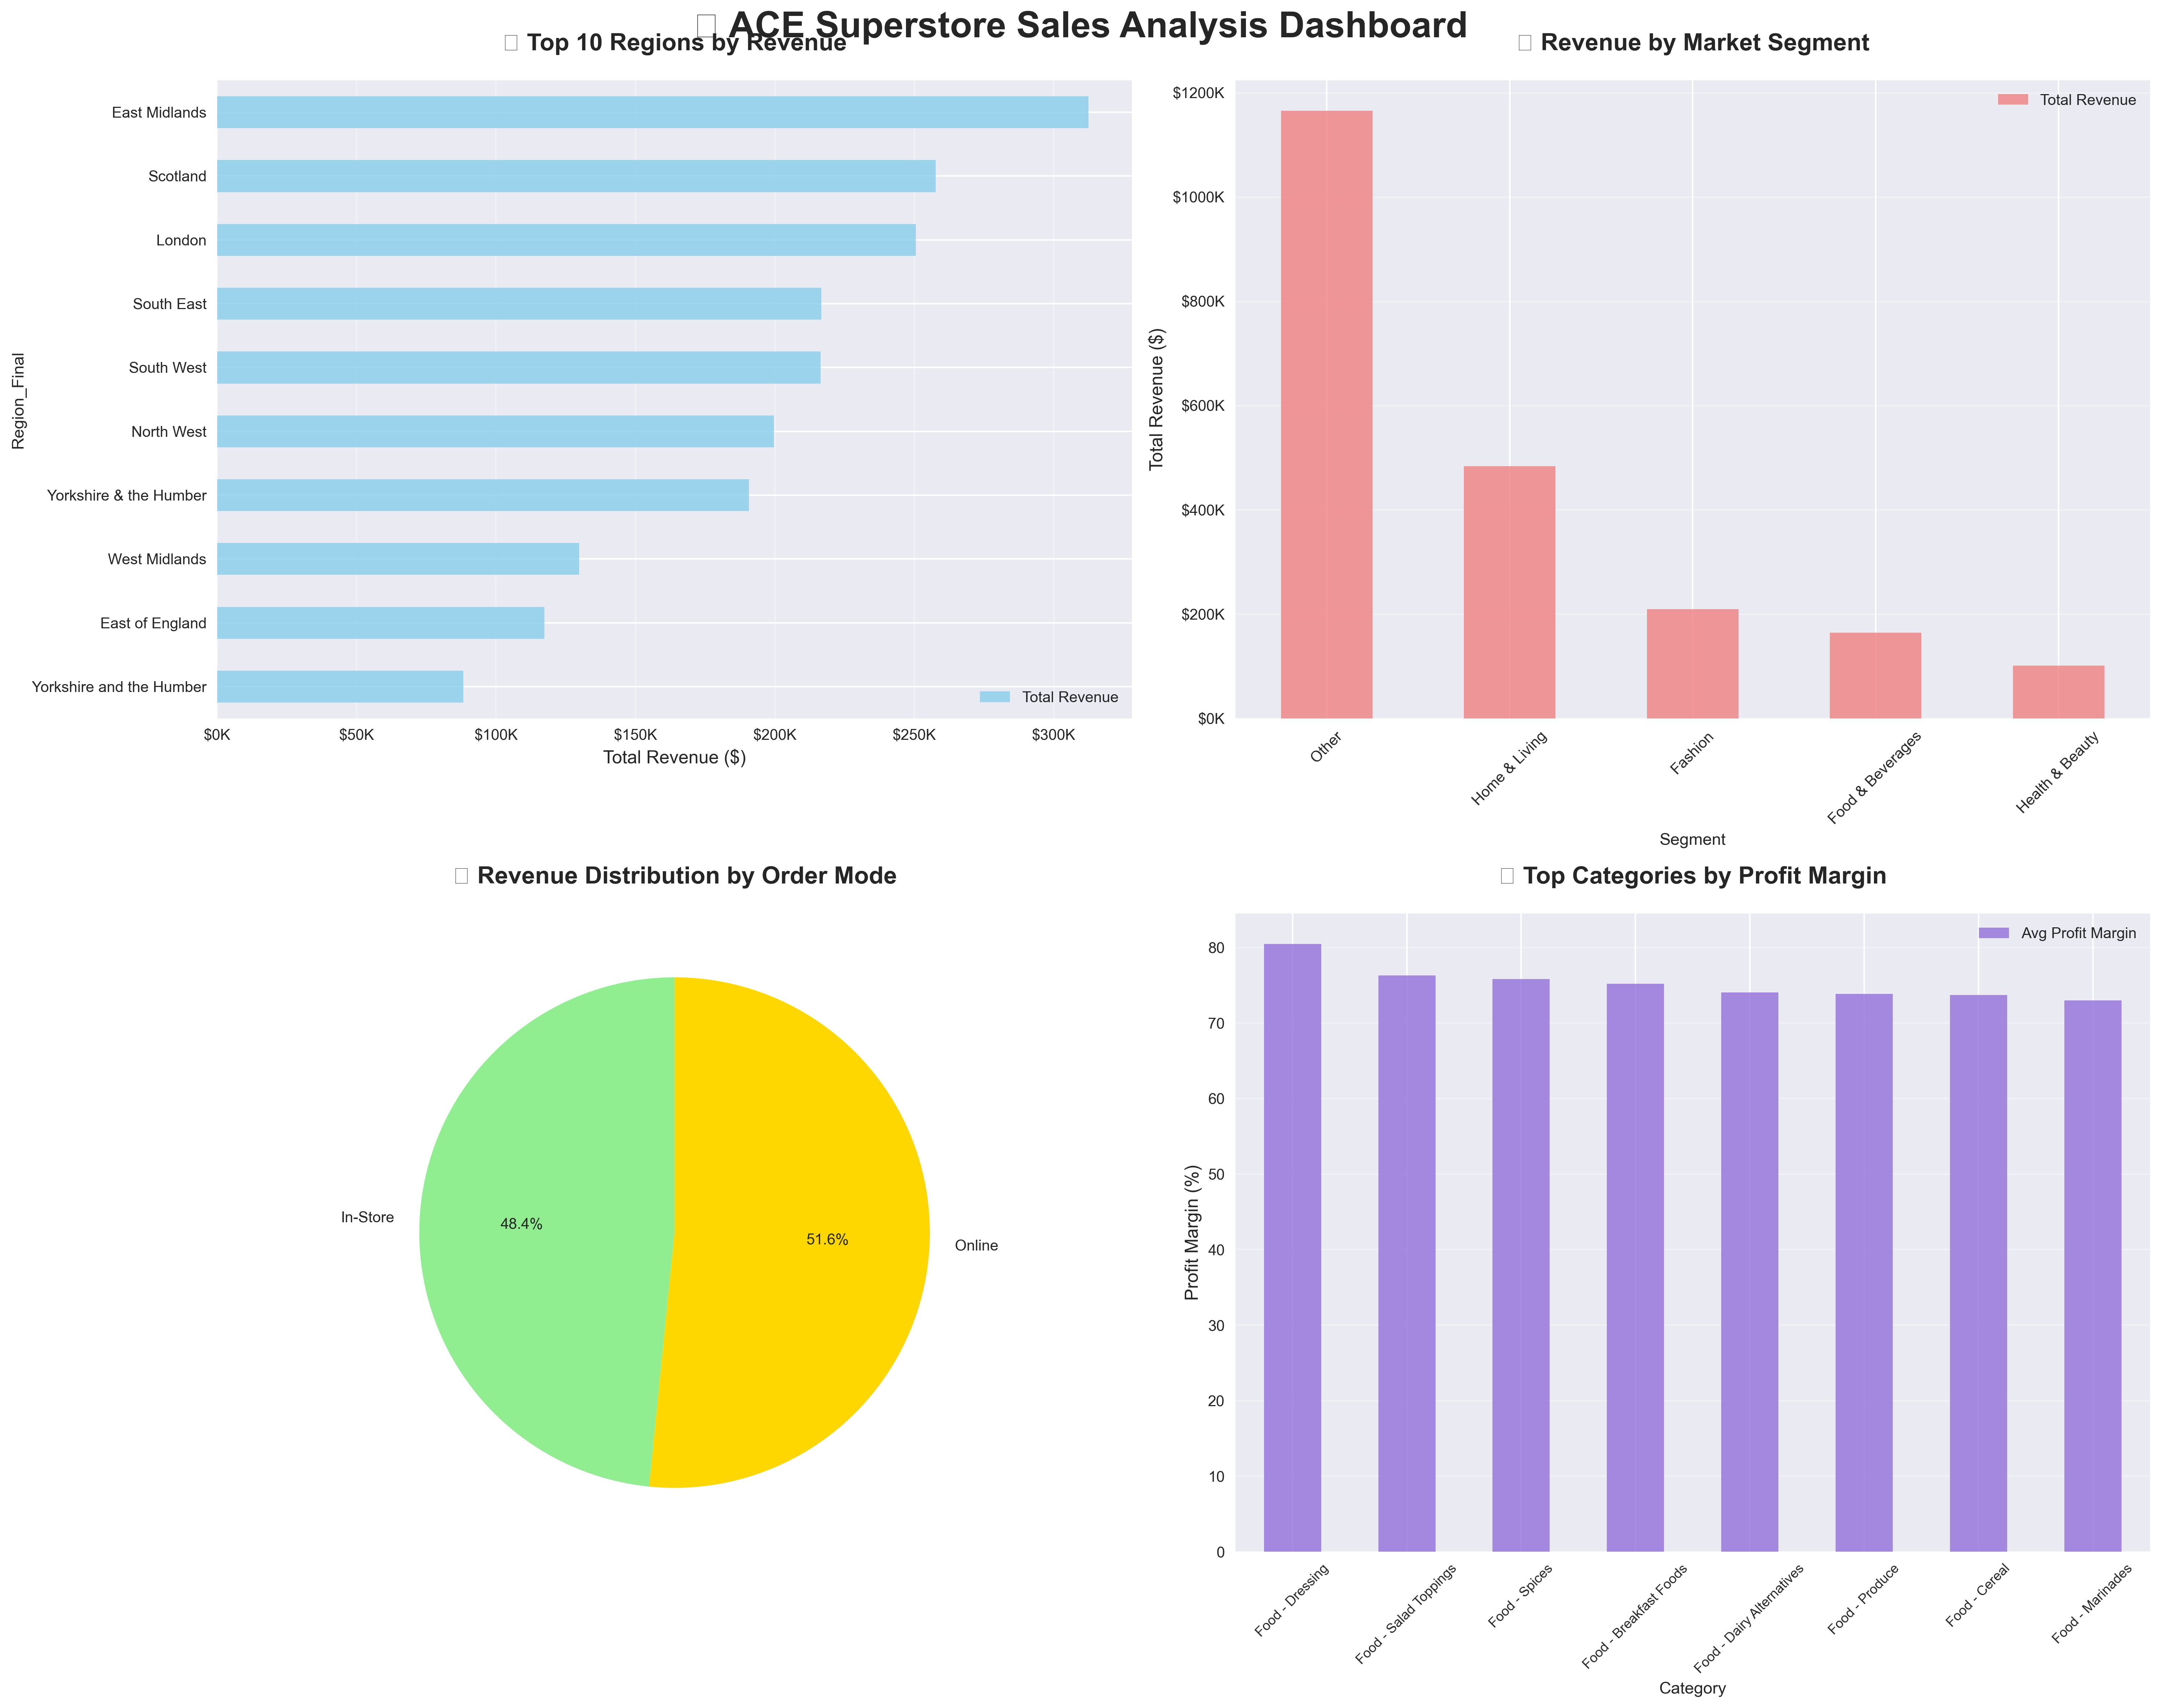

In [226]:

# Create comprehensive dashboard
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('🏪 ACE Superstore Sales Analysis Dashboard', fontsize=24, y=0.98, fontweight='bold')

# 1. Regional Revenue Performance (Top 10)
top_regions = regional_data.head(10)
top_regions.sort_values('Total Revenue', ascending=True).plot(
    y='Total Revenue', kind='barh', ax=axes[0,0], color='skyblue', alpha=0.8
)
axes[0,0].set_title('💰 Top 10 Regions by Revenue', fontsize=16, fontweight='bold', pad=20)
axes[0,0].set_xlabel('Total Revenue ($)', fontsize=12)
axes[0,0].grid(axis='x', alpha=0.3)
axes[0,0].tick_params(axis='y', labelsize=10)

# Format x-axis labels
axes[0,0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# 2. Segment Performance
segment_data.plot(y='Total Revenue', kind='bar', ax=axes[0,1], color='lightcoral', alpha=0.8)
axes[0,1].set_title('🎯 Revenue by Market Segment', fontsize=16, fontweight='bold', pad=20)
axes[0,1].set_ylabel('Total Revenue ($)', fontsize=12)
axes[0,1].tick_params(axis='x', rotation=45, labelsize=10)
axes[0,1].grid(axis='y', alpha=0.3)
axes[0,1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# 3. Order Mode Distribution
order_mode_data['Total Revenue'].plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%',
                                     colors=['lightgreen', 'gold'], startangle=90)
axes[1,0].set_title('🛒 Revenue Distribution by Order Mode', fontsize=16, fontweight='bold', pad=20)
axes[1,0].set_ylabel('')

# 4. Top Categories by Profit Margin
top_margin_categories = category_margins_data.head(8)
top_margin_categories.plot(y='Avg Profit Margin', kind='bar', ax=axes[1,1], color='mediumpurple', alpha=0.8)
axes[1,1].set_title('💡 Top Categories by Profit Margin', fontsize=16, fontweight='bold', pad=20)
axes[1,1].set_ylabel('Profit Margin (%)', fontsize=12)
axes[1,1].tick_params(axis='x', rotation=45, labelsize=9)
axes[1,1].grid(axis='y', alpha=0.3)

# Adjust layout and save
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.savefig('ace_superstore_analysis_dashboard.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()


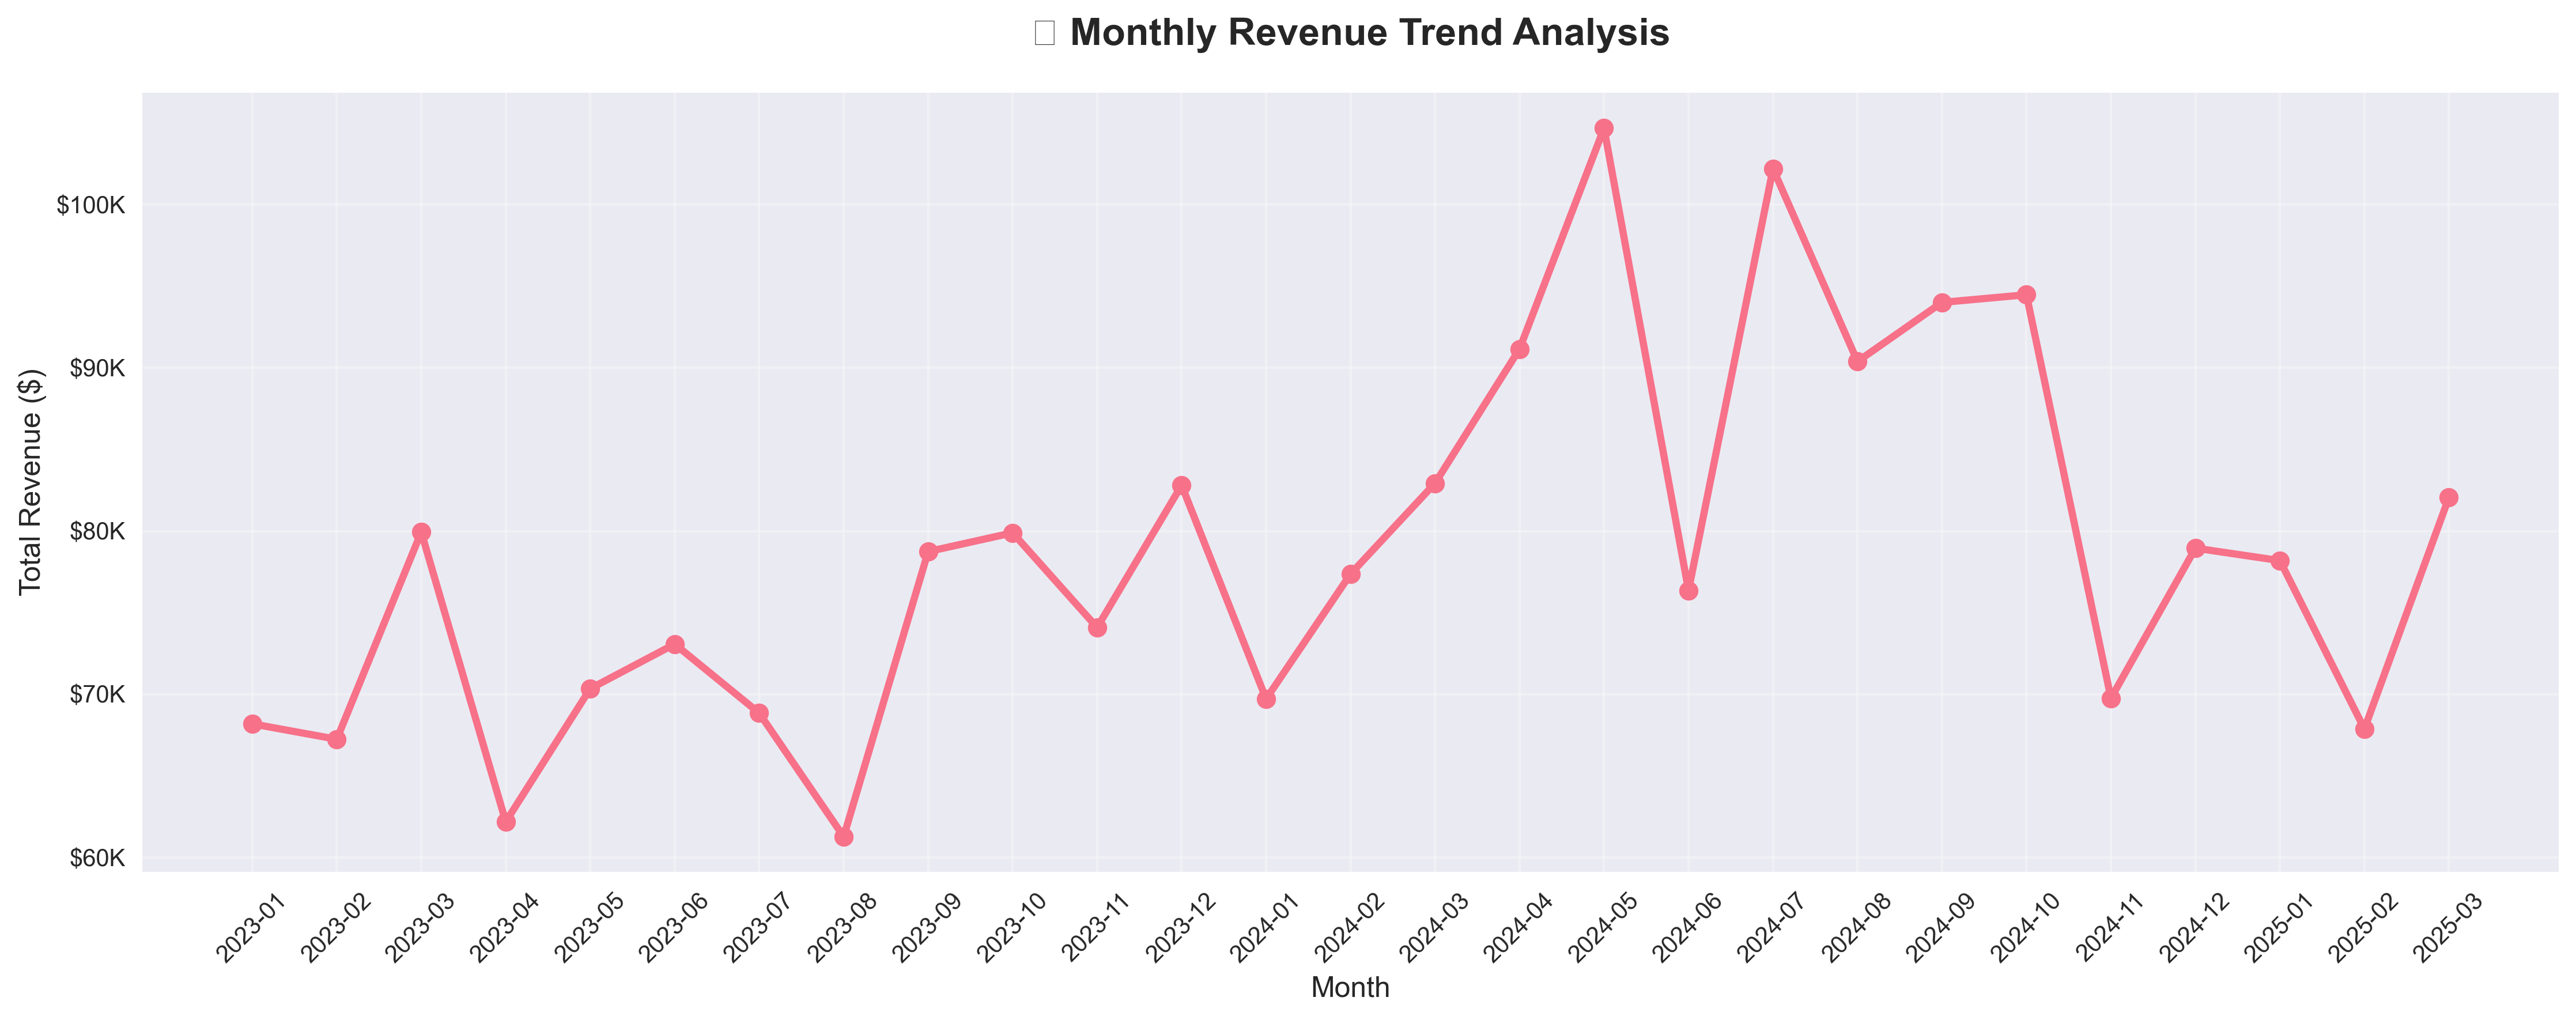

In [227]:

# Revenue trend over time
plt.figure(figsize=(15, 6))
monthly_revenue = df.groupby(df['Order Date'].dt.to_period('M'))['Total Revenue'].sum()
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values, marker='o', linewidth=3, markersize=8)
plt.title('📈 Monthly Revenue Trend Analysis', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
plt.tight_layout()
plt.show()



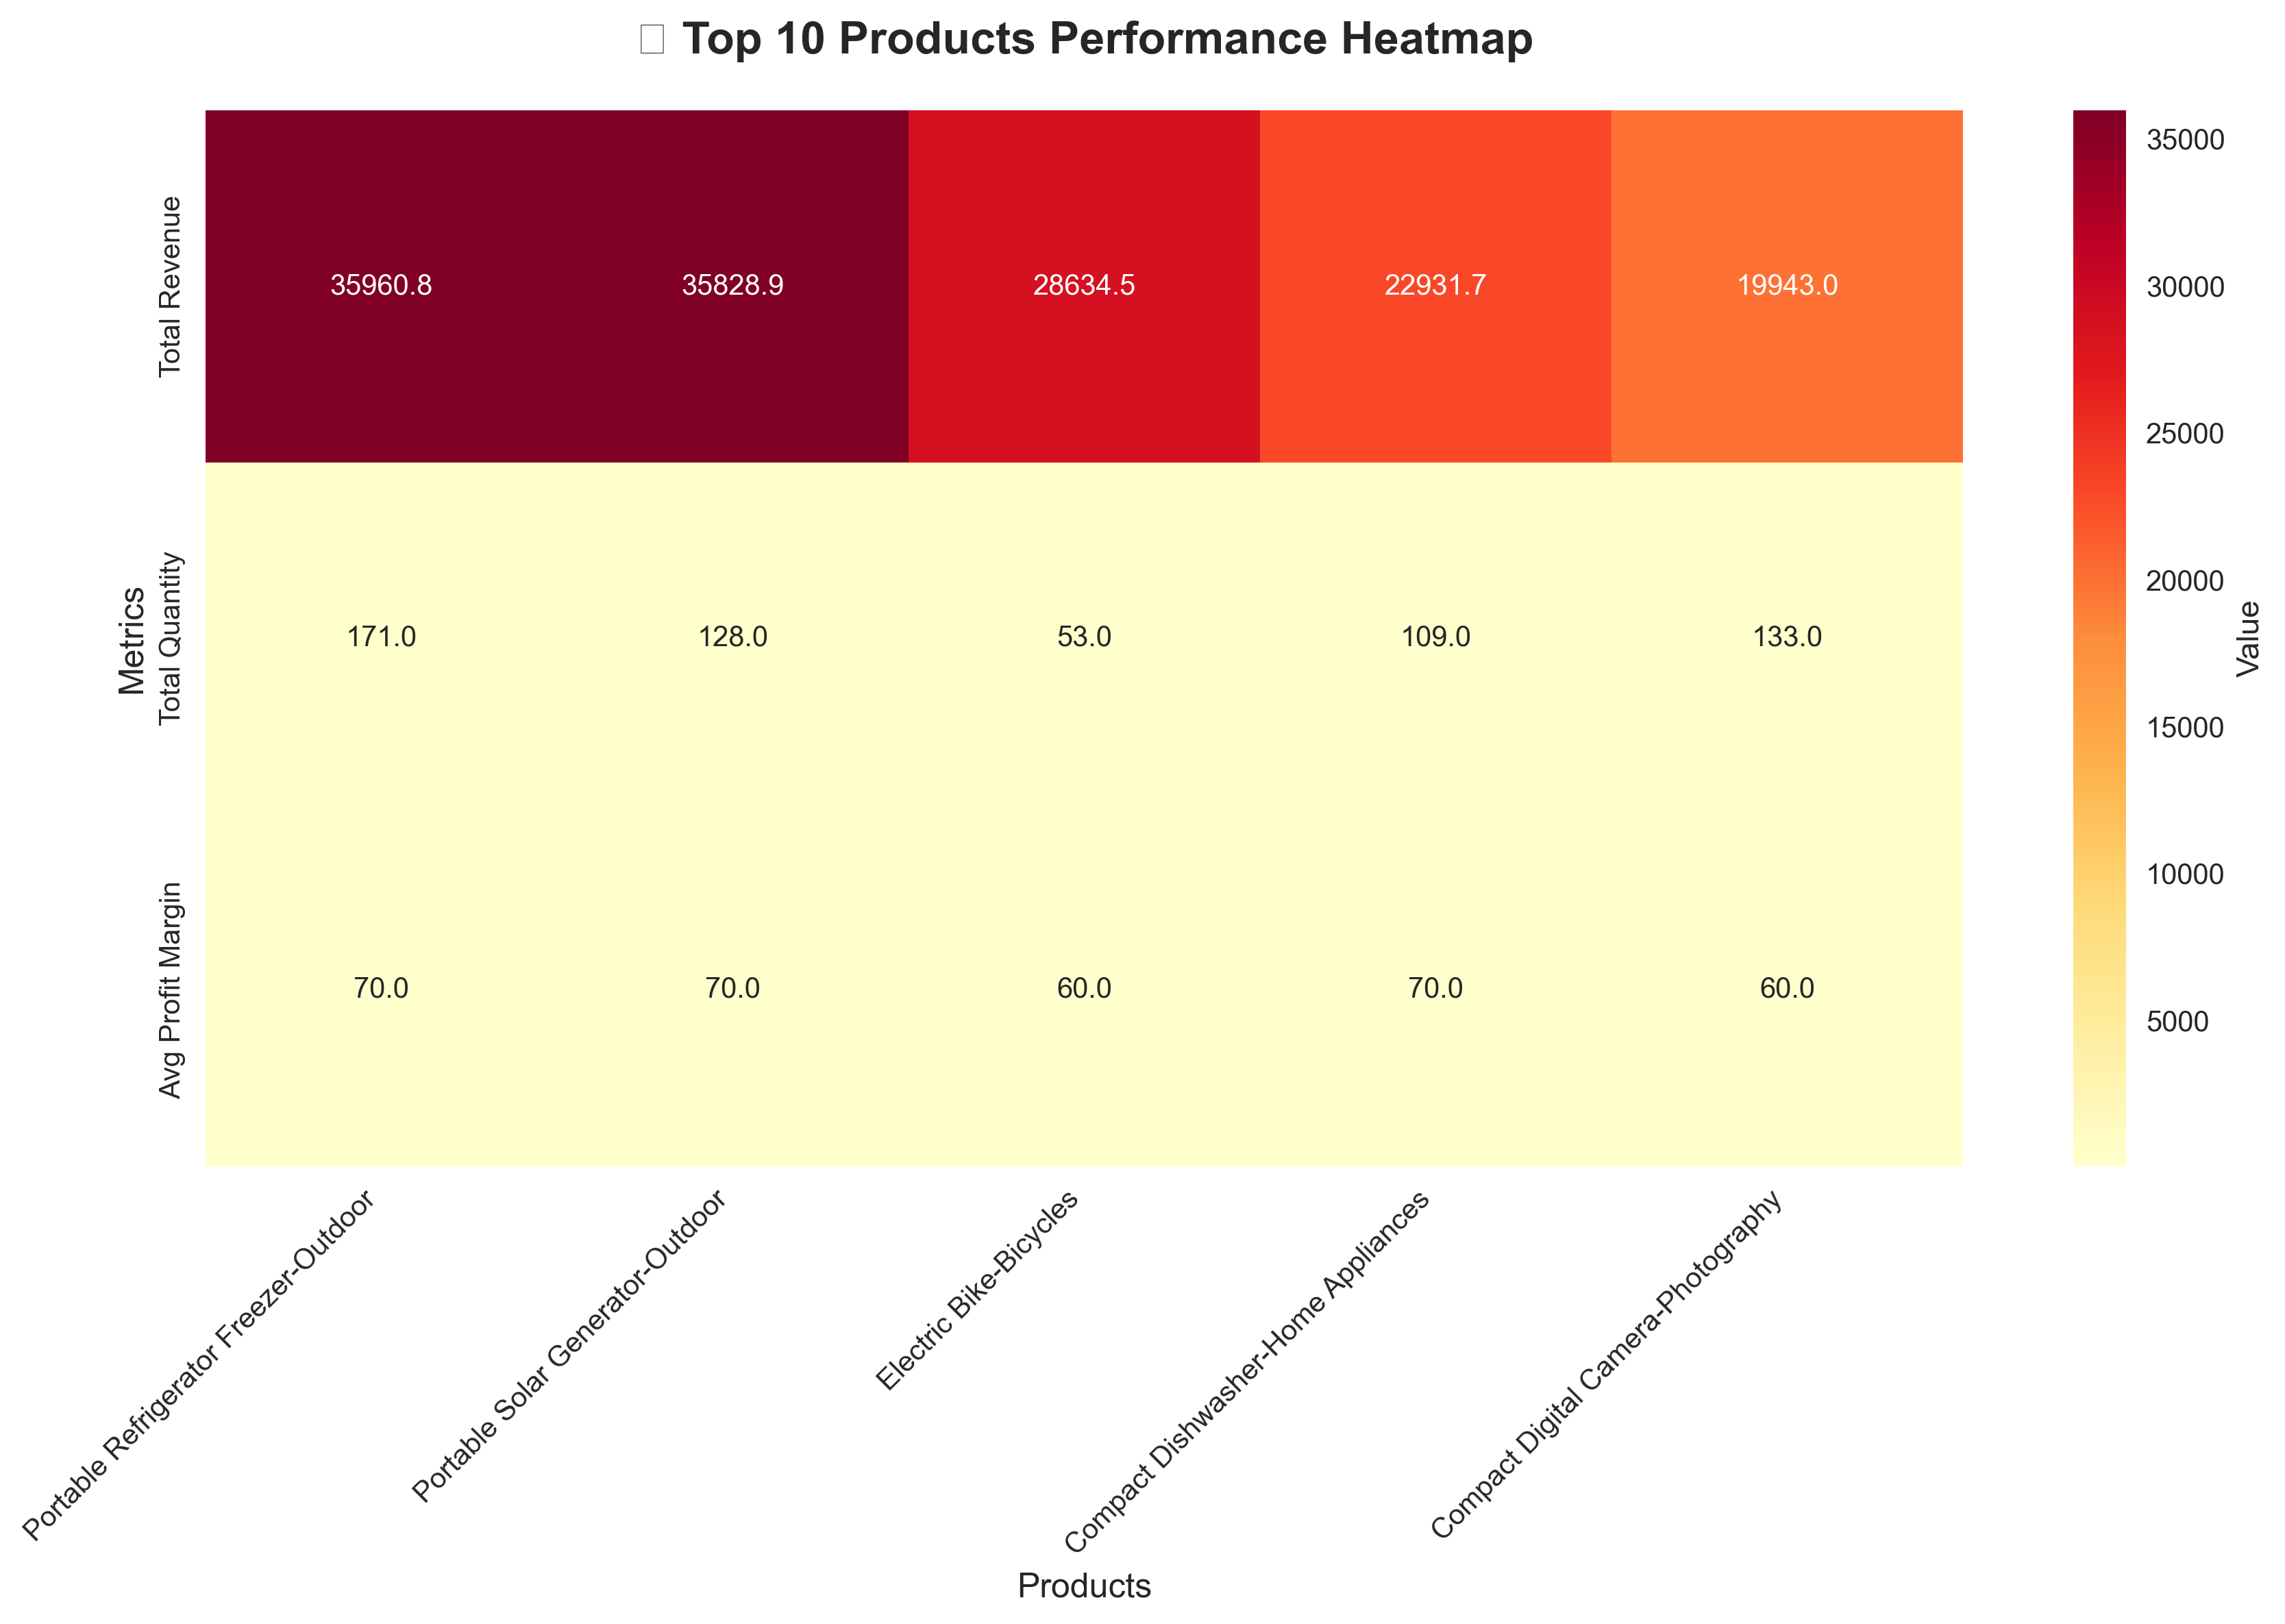

In [228]:

# Top products heatmap
plt.figure(figsize=(12, 8))
top_products_matrix = top_products_data[['Total Revenue', 'Total Quantity', 'Avg Profit Margin']].head(10)
sns.heatmap(top_products_matrix.T, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Value'})
plt.title('🔥 Top 10 Products Performance Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 📋 Business Intelligence Report Generation
Creating a comprehensive executive summary and strategic recommendations based on our analysis.

In [229]:

# Display summary of key findings
print("\n🏆 KEY FINDINGS SUMMARY:")
print(f"• Total Business Value: ${df['Total Revenue'].sum():,.2f}")
print(f"• Best Performing Region: {regional_data.index[0]} ({regional_data.iloc[0]['Revenue Market Share (%)']:.1f}% market share)")
print(f"• Leading Segment: {segment_data.index[0]} ({segment_data.iloc[0]['Revenue Market Share (%)']:.1f}% market share)")
print(f"• Highest Margin Category: {category_margins_data.index[0]} ({category_margins_data.iloc[0]['Avg Profit Margin']:.1f}% margin)")
leading_channel = "Online" if order_mode_data.loc['Online', 'Revenue %'] > order_mode_data.loc['In-Store', 'Revenue %'] else "In-Store"
print(f"• Leading Channel: {leading_channel} ({order_mode_data.loc[leading_channel, 'Revenue %']:.1f}% revenue share)")



🏆 KEY FINDINGS SUMMARY:
• Total Business Value: $2,126,853.54
• Best Performing Region: East Midlands (14.8% market share)
• Leading Segment: Other (54.8% market share)
• Highest Margin Category: Food - Dressing (80.5% margin)
• Leading Channel: Online (51.6% revenue share)


## 📸 Creating and Saving Visualizations as Images
Let's create all necessary visualizations and save them as images in the diagrams folder for our README documentation.

In [230]:
# Create diagrams folder
import os
if not os.path.exists('diagrams'):
    os.makedirs('diagrams')
    print("✅ Created diagrams folder")
else:
    print("📁 Diagrams folder already exists")

# Set matplotlib to save high-quality images
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'


📁 Diagrams folder already exists


In [231]:

# Regional Summary
regional_summary = df.groupby('Region_Final').agg({
    'Total Sales': 'sum',
    'Total Revenue': 'sum',
    'Discount': 'mean',
    'Order ID': 'count',
    'Customer ID': 'nunique'
}).round(2)
regional_summary.columns = ['Total Sales', 'Total Revenue', 'Avg Discount Rate', 'Order Count', 'Unique Customers']
regional_summary = regional_summary.sort_values('Total Revenue', ascending=False)
regional_summary['Revenue Market Share (%)'] = (regional_summary['Total Revenue'] / regional_summary['Total Revenue'].sum() * 100).round(2)

# Segment Summary
segment_summary = df.groupby('Segment').agg({
    'Total Sales': 'sum',
    'Total Revenue': 'sum',
    'Discount': 'mean',
    'Order ID': 'count',
    'Customer ID': 'nunique'
}).round(2)
segment_summary.columns = ['Total Sales', 'Total Revenue', 'Avg Discount Rate', 'Order Count', 'Unique Customers']
segment_summary = segment_summary.sort_values('Total Revenue', ascending=False)

# Product Analysis
product_revenue = df.groupby(['Product Name', 'Category']).agg({
    'Total Revenue': 'sum',
    'Total Sales': 'sum',
    'Quantity': 'sum',
    'Profit Margin': 'mean',
    'Order ID': 'count'
}).round(2)
top_products = product_revenue.sort_values('Total Revenue', ascending=False).head(5)

# Category Margins
category_margins = df.groupby('Category').agg({
    'Profit Margin': 'mean',
    'Total Revenue': 'sum',
    'Total Sales': 'sum',
    'Order ID': 'count'
}).round(2)
category_margins = category_margins.sort_values('Profit Margin', ascending=False)

# Order Mode Analysis
order_mode_analysis = df.groupby('Order Mode').agg({
    'Total Sales': 'sum',
    'Total Revenue': 'sum',
    'Order ID': 'count',
    'Discount': 'mean',
    'Customer ID': 'nunique',
    'Profit Margin': 'mean'
}).round(2)
order_mode_analysis['Revenue %'] = (order_mode_analysis['Total Revenue'] / order_mode_analysis['Total Revenue'].sum() * 100).round(2)


📊 Creating Comprehensive Dashboard...


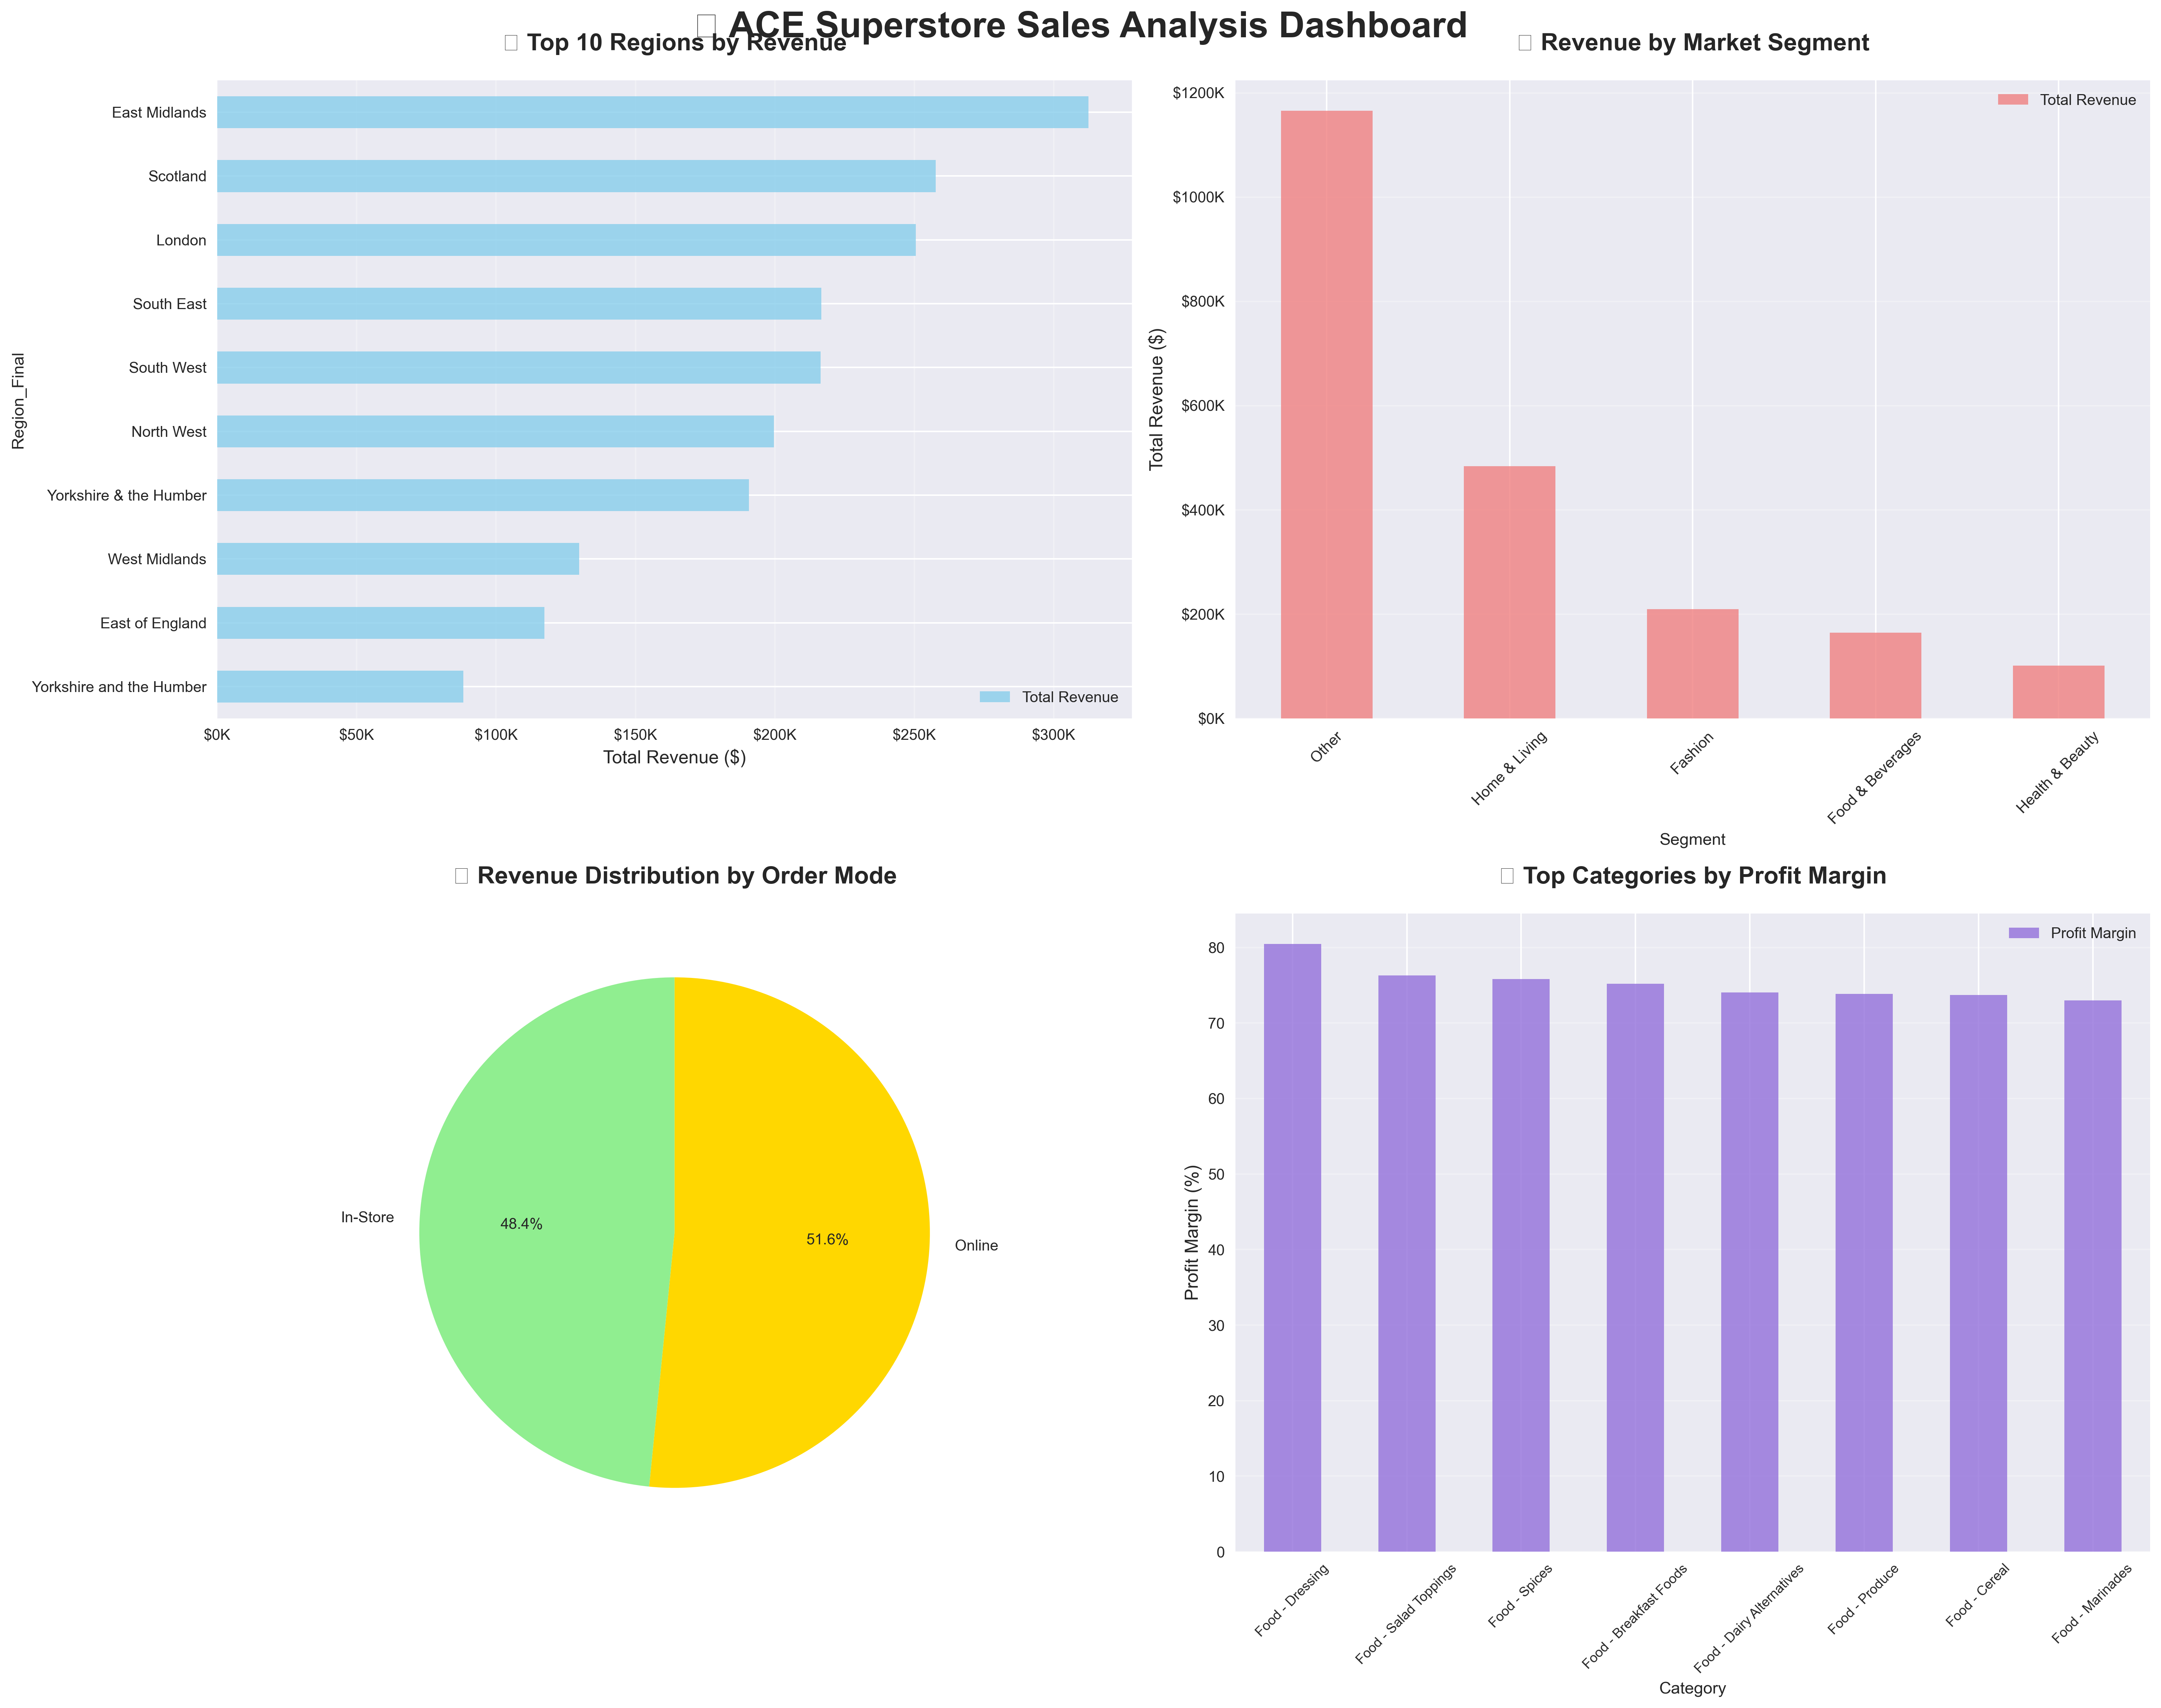

In [232]:
# 1. COMPREHENSIVE DASHBOARD
print("📊 Creating Comprehensive Dashboard...")

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('🏪 ACE Superstore Sales Analysis Dashboard', fontsize=24, y=0.98, fontweight='bold')

# Regional Revenue Performance (Top 10)
top_regions = regional_summary.head(10)
top_regions.sort_values('Total Revenue', ascending=True).plot(
    y='Total Revenue', kind='barh', ax=axes[0,0], color='skyblue', alpha=0.8
)
axes[0,0].set_title('💰 Top 10 Regions by Revenue', fontsize=16, fontweight='bold', pad=20)
axes[0,0].set_xlabel('Total Revenue ($)', fontsize=12)
axes[0,0].grid(axis='x', alpha=0.3)
axes[0,0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Segment Performance
segment_summary.plot(y='Total Revenue', kind='bar', ax=axes[0,1], color='lightcoral', alpha=0.8)
axes[0,1].set_title('🎯 Revenue by Market Segment', fontsize=16, fontweight='bold', pad=20)
axes[0,1].set_ylabel('Total Revenue ($)', fontsize=12)
axes[0,1].tick_params(axis='x', rotation=45, labelsize=10)
axes[0,1].grid(axis='y', alpha=0.3)
axes[0,1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Order Mode Distribution
order_mode_analysis['Total Revenue'].plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%',
                                         colors=['lightgreen', 'gold'], startangle=90)
axes[1,0].set_title('🛒 Revenue Distribution by Order Mode', fontsize=16, fontweight='bold', pad=20)
axes[1,0].set_ylabel('')

# Top Categories by Profit Margin
top_margin_categories = category_margins.head(8)
top_margin_categories.plot(y='Profit Margin', kind='bar', ax=axes[1,1], color='mediumpurple', alpha=0.8)
axes[1,1].set_title('💡 Top Categories by Profit Margin', fontsize=16, fontweight='bold', pad=20)
axes[1,1].set_ylabel('Profit Margin (%)', fontsize=12)
axes[1,1].tick_params(axis='x', rotation=45, labelsize=9)
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.savefig('diagrams/comprehensive_dashboard.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()


🌍 Creating Regional Performance Chart...


<Figure size 4500x2400 with 0 Axes>

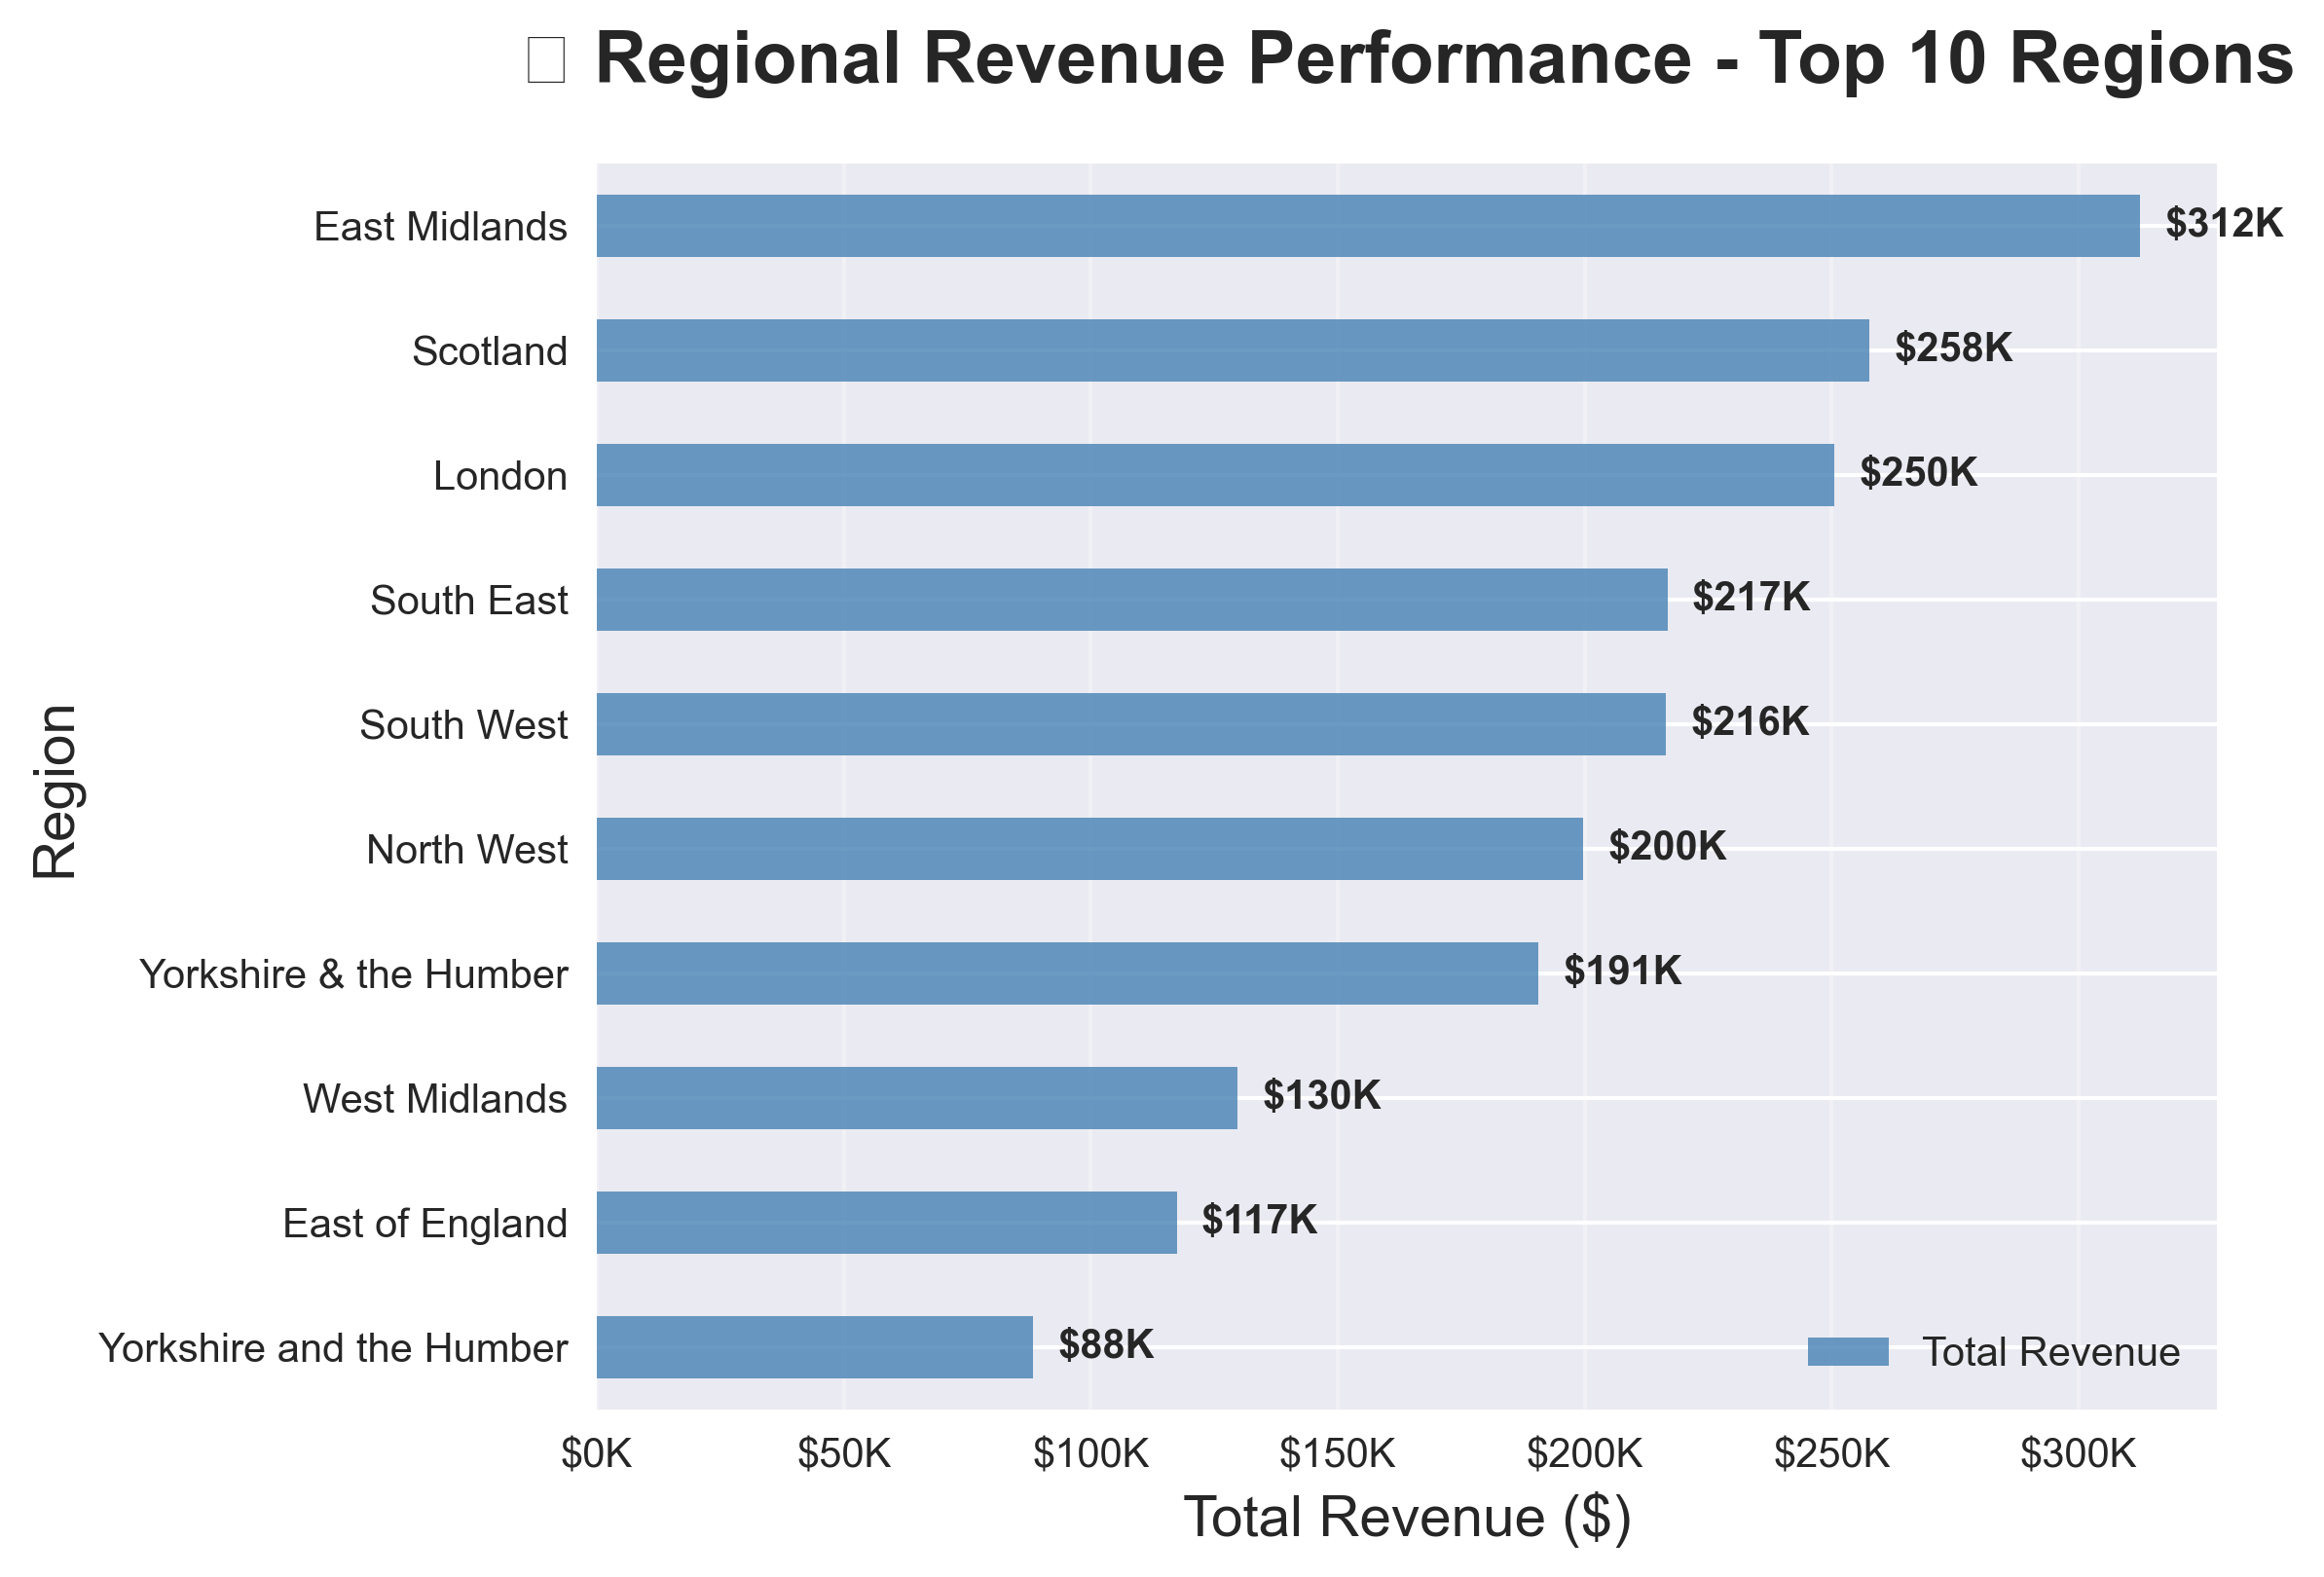

In [233]:
# 2. REGIONAL PERFORMANCE CHART
print("🌍 Creating Regional Performance Chart...")

plt.figure(figsize=(15, 8))
regional_summary.head(10).sort_values('Total Revenue', ascending=True).plot(
    y='Total Revenue', kind='barh', color='steelblue', alpha=0.8
)
plt.title('🌍 Regional Revenue Performance - Top 10 Regions', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Total Revenue ($)', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Add value labels on bars
for i, (region, revenue) in enumerate(regional_summary.head(10).sort_values('Total Revenue', ascending=True)['Total Revenue'].items()):
    plt.text(revenue + 5000, i, f'${revenue/1000:.0f}K', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('diagrams/regional_performance.png', dpi=300, bbox_inches='tight')
plt.show()


🛍️ Creating Top Products Chart...


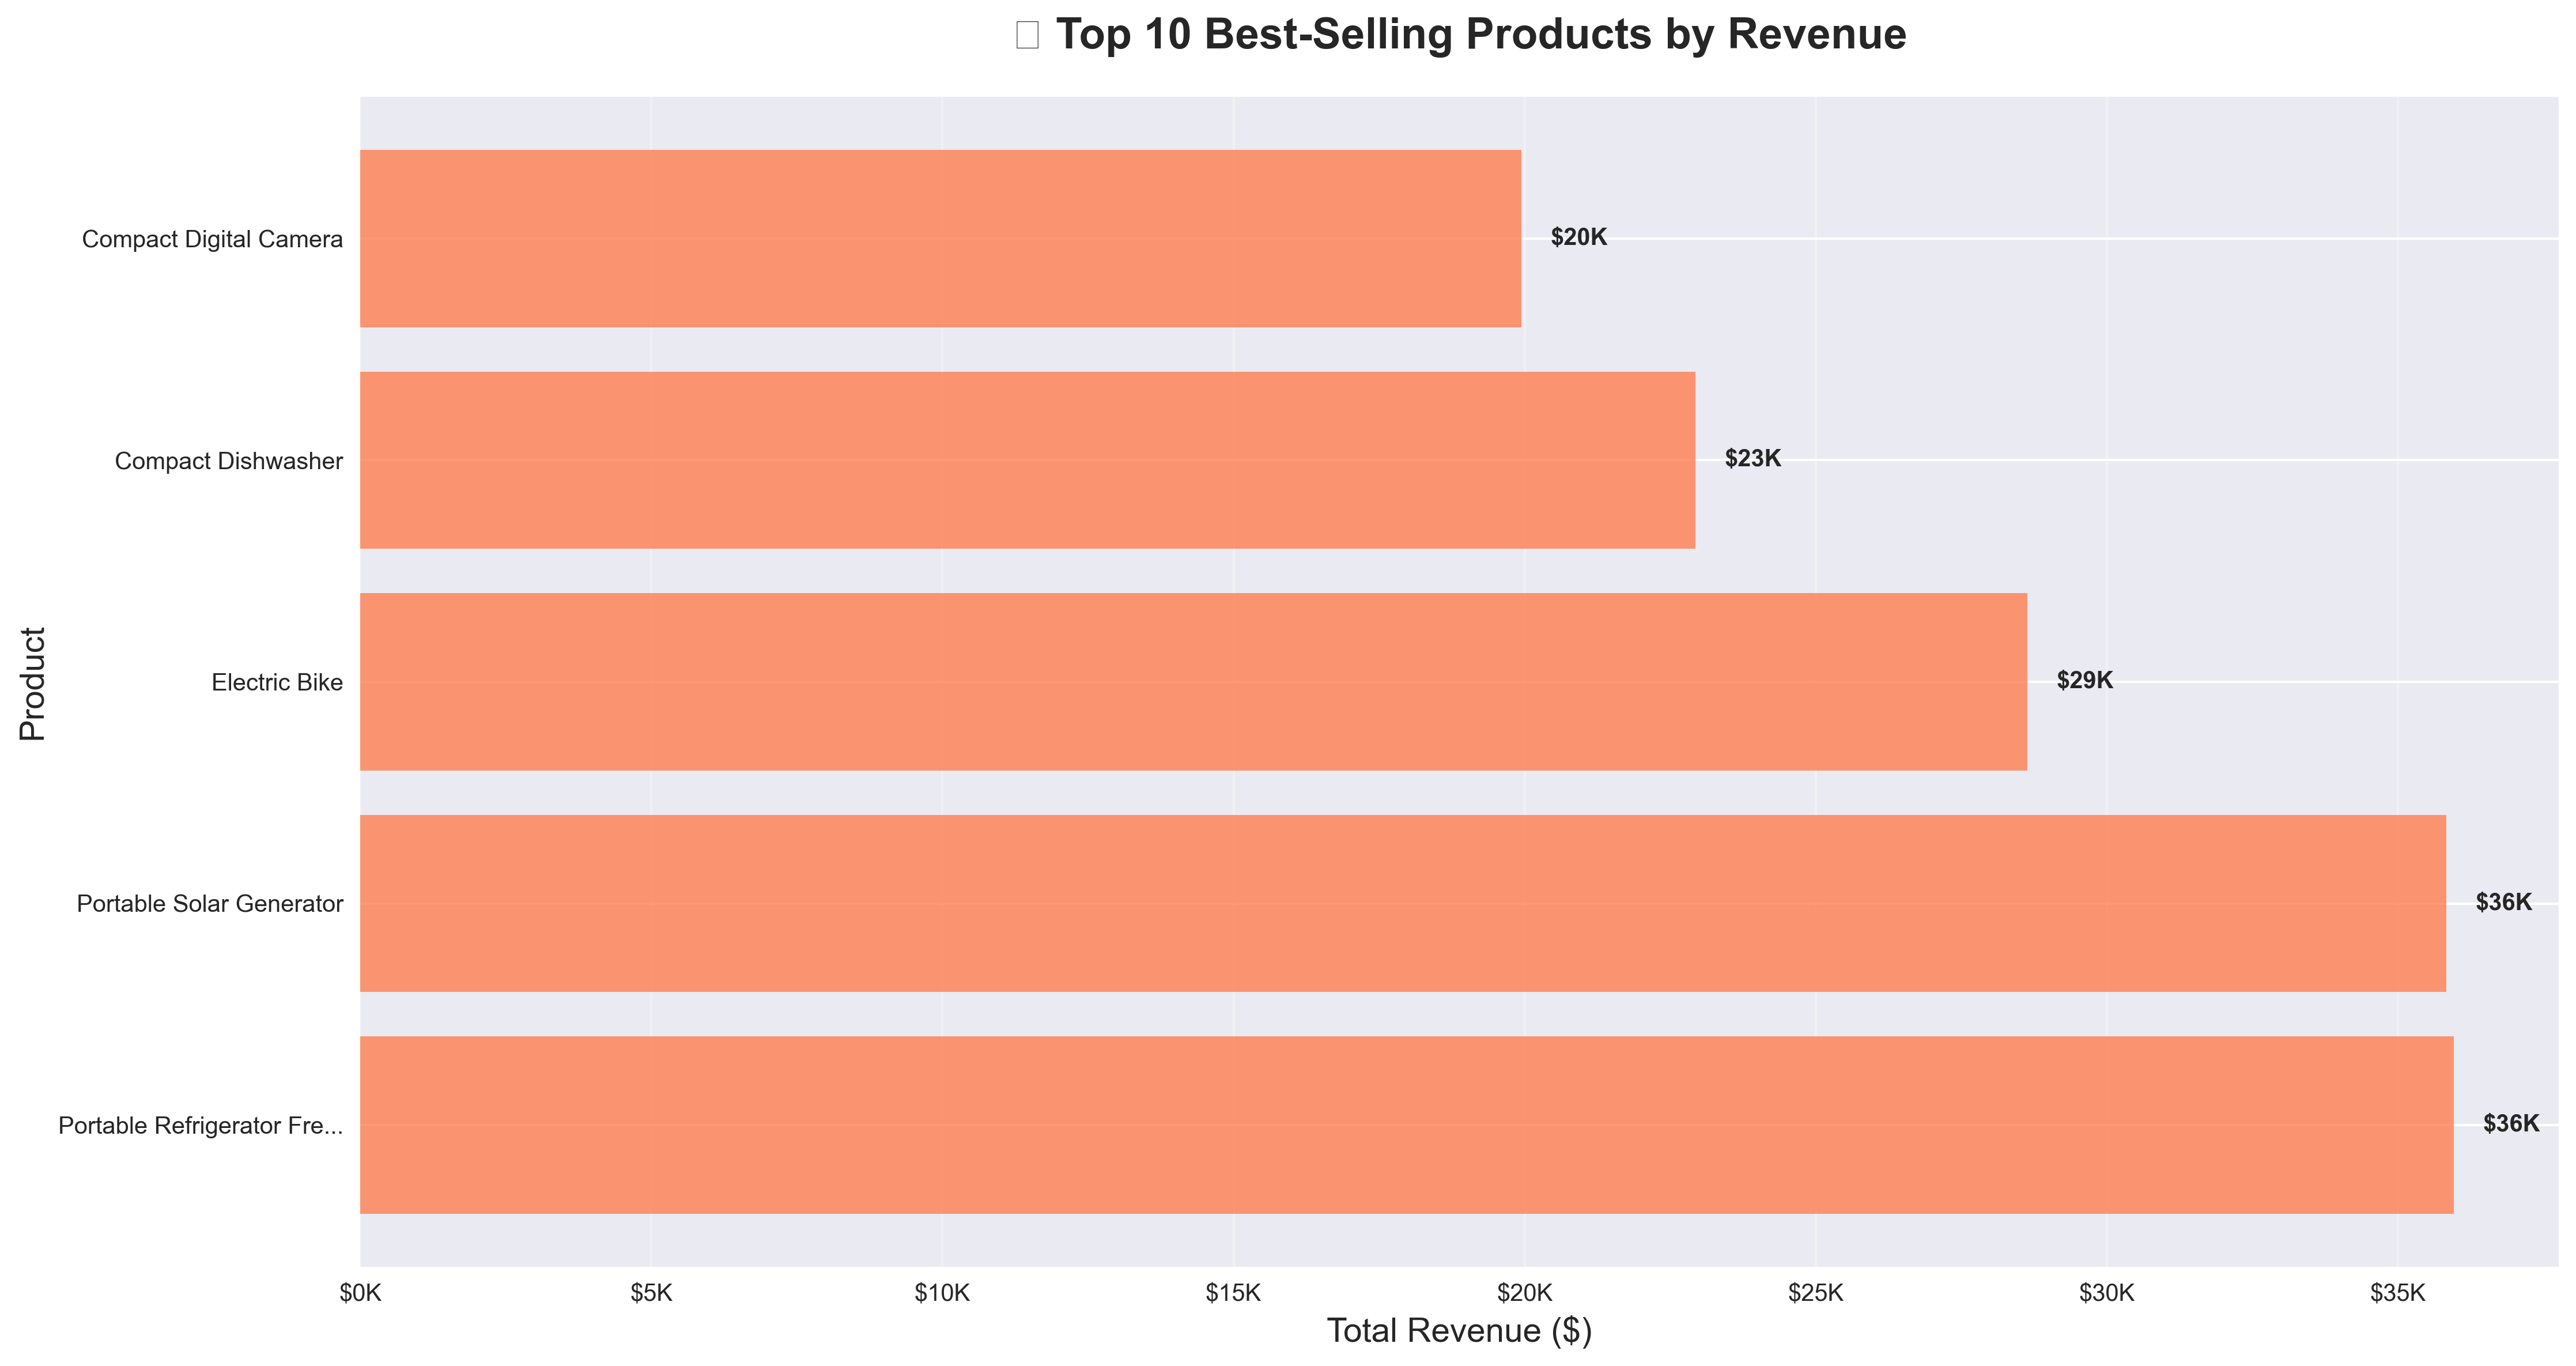

In [234]:
# 3. TOP PRODUCTS PERFORMANCE CHART
print("🛍️ Creating Top Products Chart...")

plt.figure(figsize=(15, 8))

# Get top 10 products by revenue
top_10_products = top_products.head(10)
product_names = [f"{name[:25]}..." if len(name) > 25 else name for name, _ in top_10_products.index]
revenues = top_10_products['Total Revenue'].values

bars = plt.barh(range(len(product_names)), revenues, color='coral', alpha=0.8)
plt.title('🏆 Top 10 Best-Selling Products by Revenue', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Total Revenue ($)', fontsize=14)
plt.ylabel('Product', fontsize=14)
plt.yticks(range(len(product_names)), product_names)
plt.grid(axis='x', alpha=0.3)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Add value labels
for i, (bar, revenue) in enumerate(zip(bars, revenues)):
    plt.text(revenue + 500, i, f'${revenue/1000:.0f}K', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('diagrams/top_products_performance.png', dpi=300, bbox_inches='tight')
plt.show()


📈 Creating Monthly Revenue Trend...


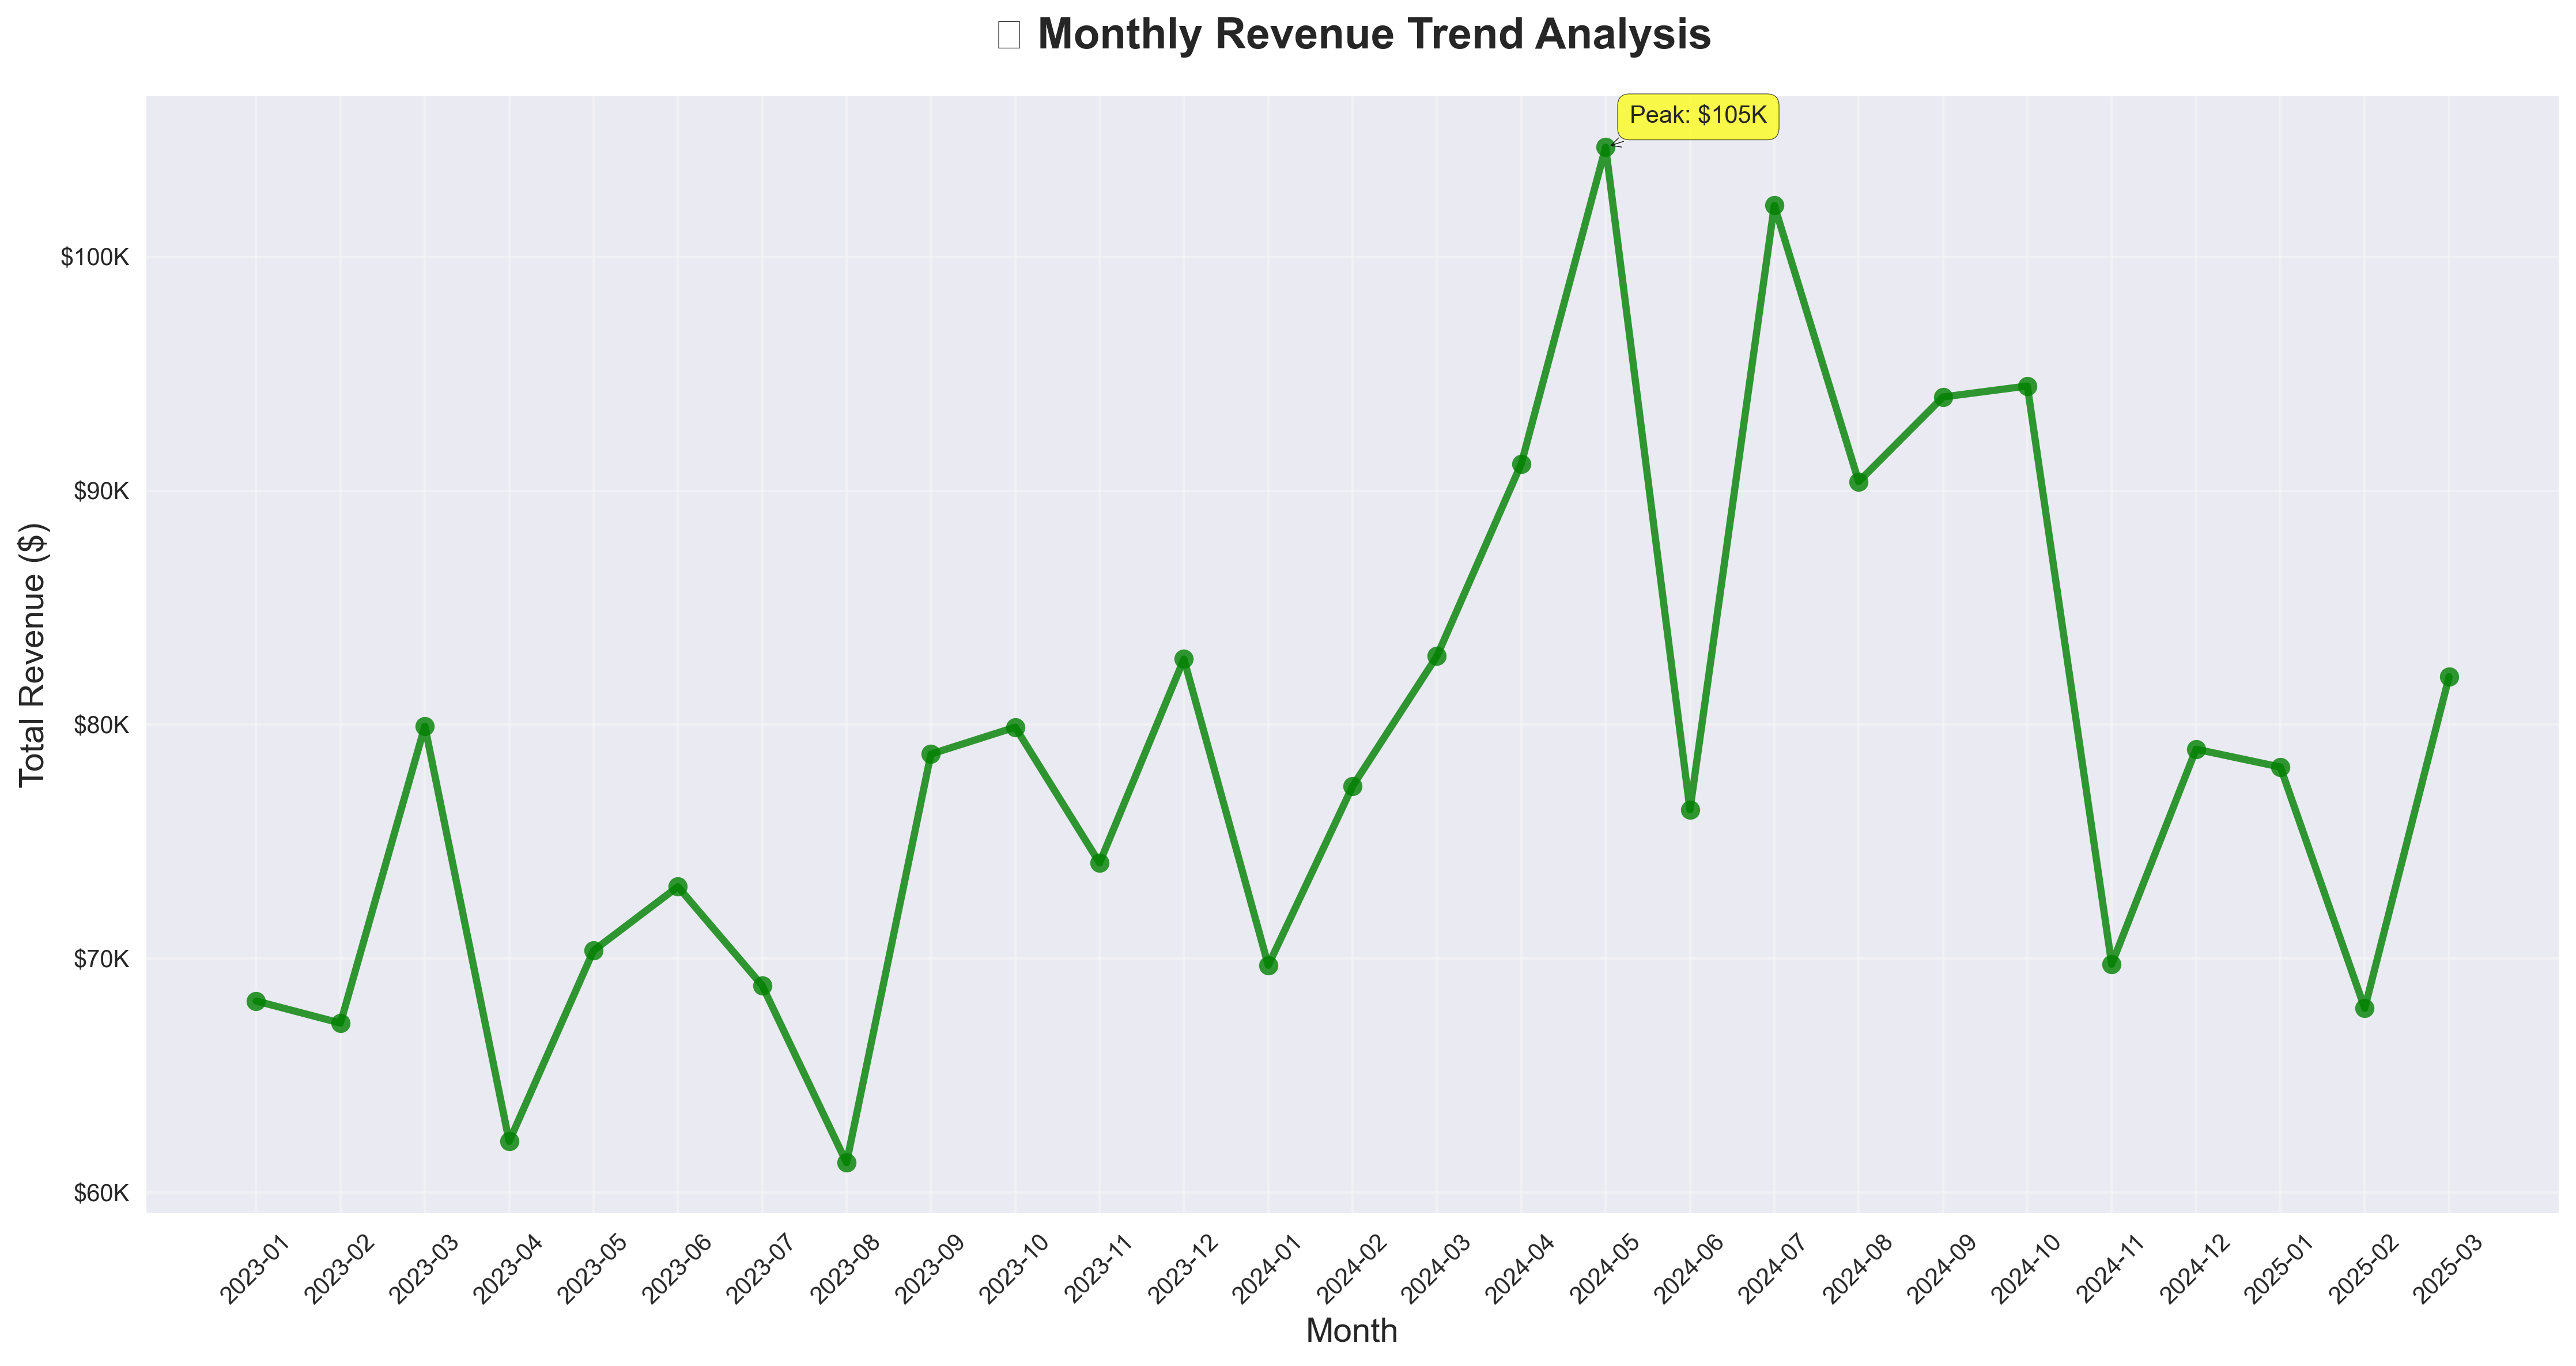

In [235]:
# 4. MONTHLY REVENUE TREND
print("📈 Creating Monthly Revenue Trend...")

plt.figure(figsize=(15, 8))
monthly_revenue = df.groupby(df['Order Date'].dt.to_period('M'))['Total Revenue'].sum()

plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values, 
         marker='o', linewidth=3, markersize=8, color='green', alpha=0.8)
plt.title('📈 Monthly Revenue Trend Analysis', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Highlight max and min points
max_month = monthly_revenue.idxmax()
min_month = monthly_revenue.idxmin()
max_value = monthly_revenue.max()
min_value = monthly_revenue.min()

plt.annotate(f'Peak: ${max_value/1000:.0f}K', 
             xy=(str(max_month), max_value), 
             xytext=(10, 10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.savefig('diagrams/monthly_revenue_trend.png', dpi=300, bbox_inches='tight')
plt.show()


💰 Creating Category Profit Margin Analysis...


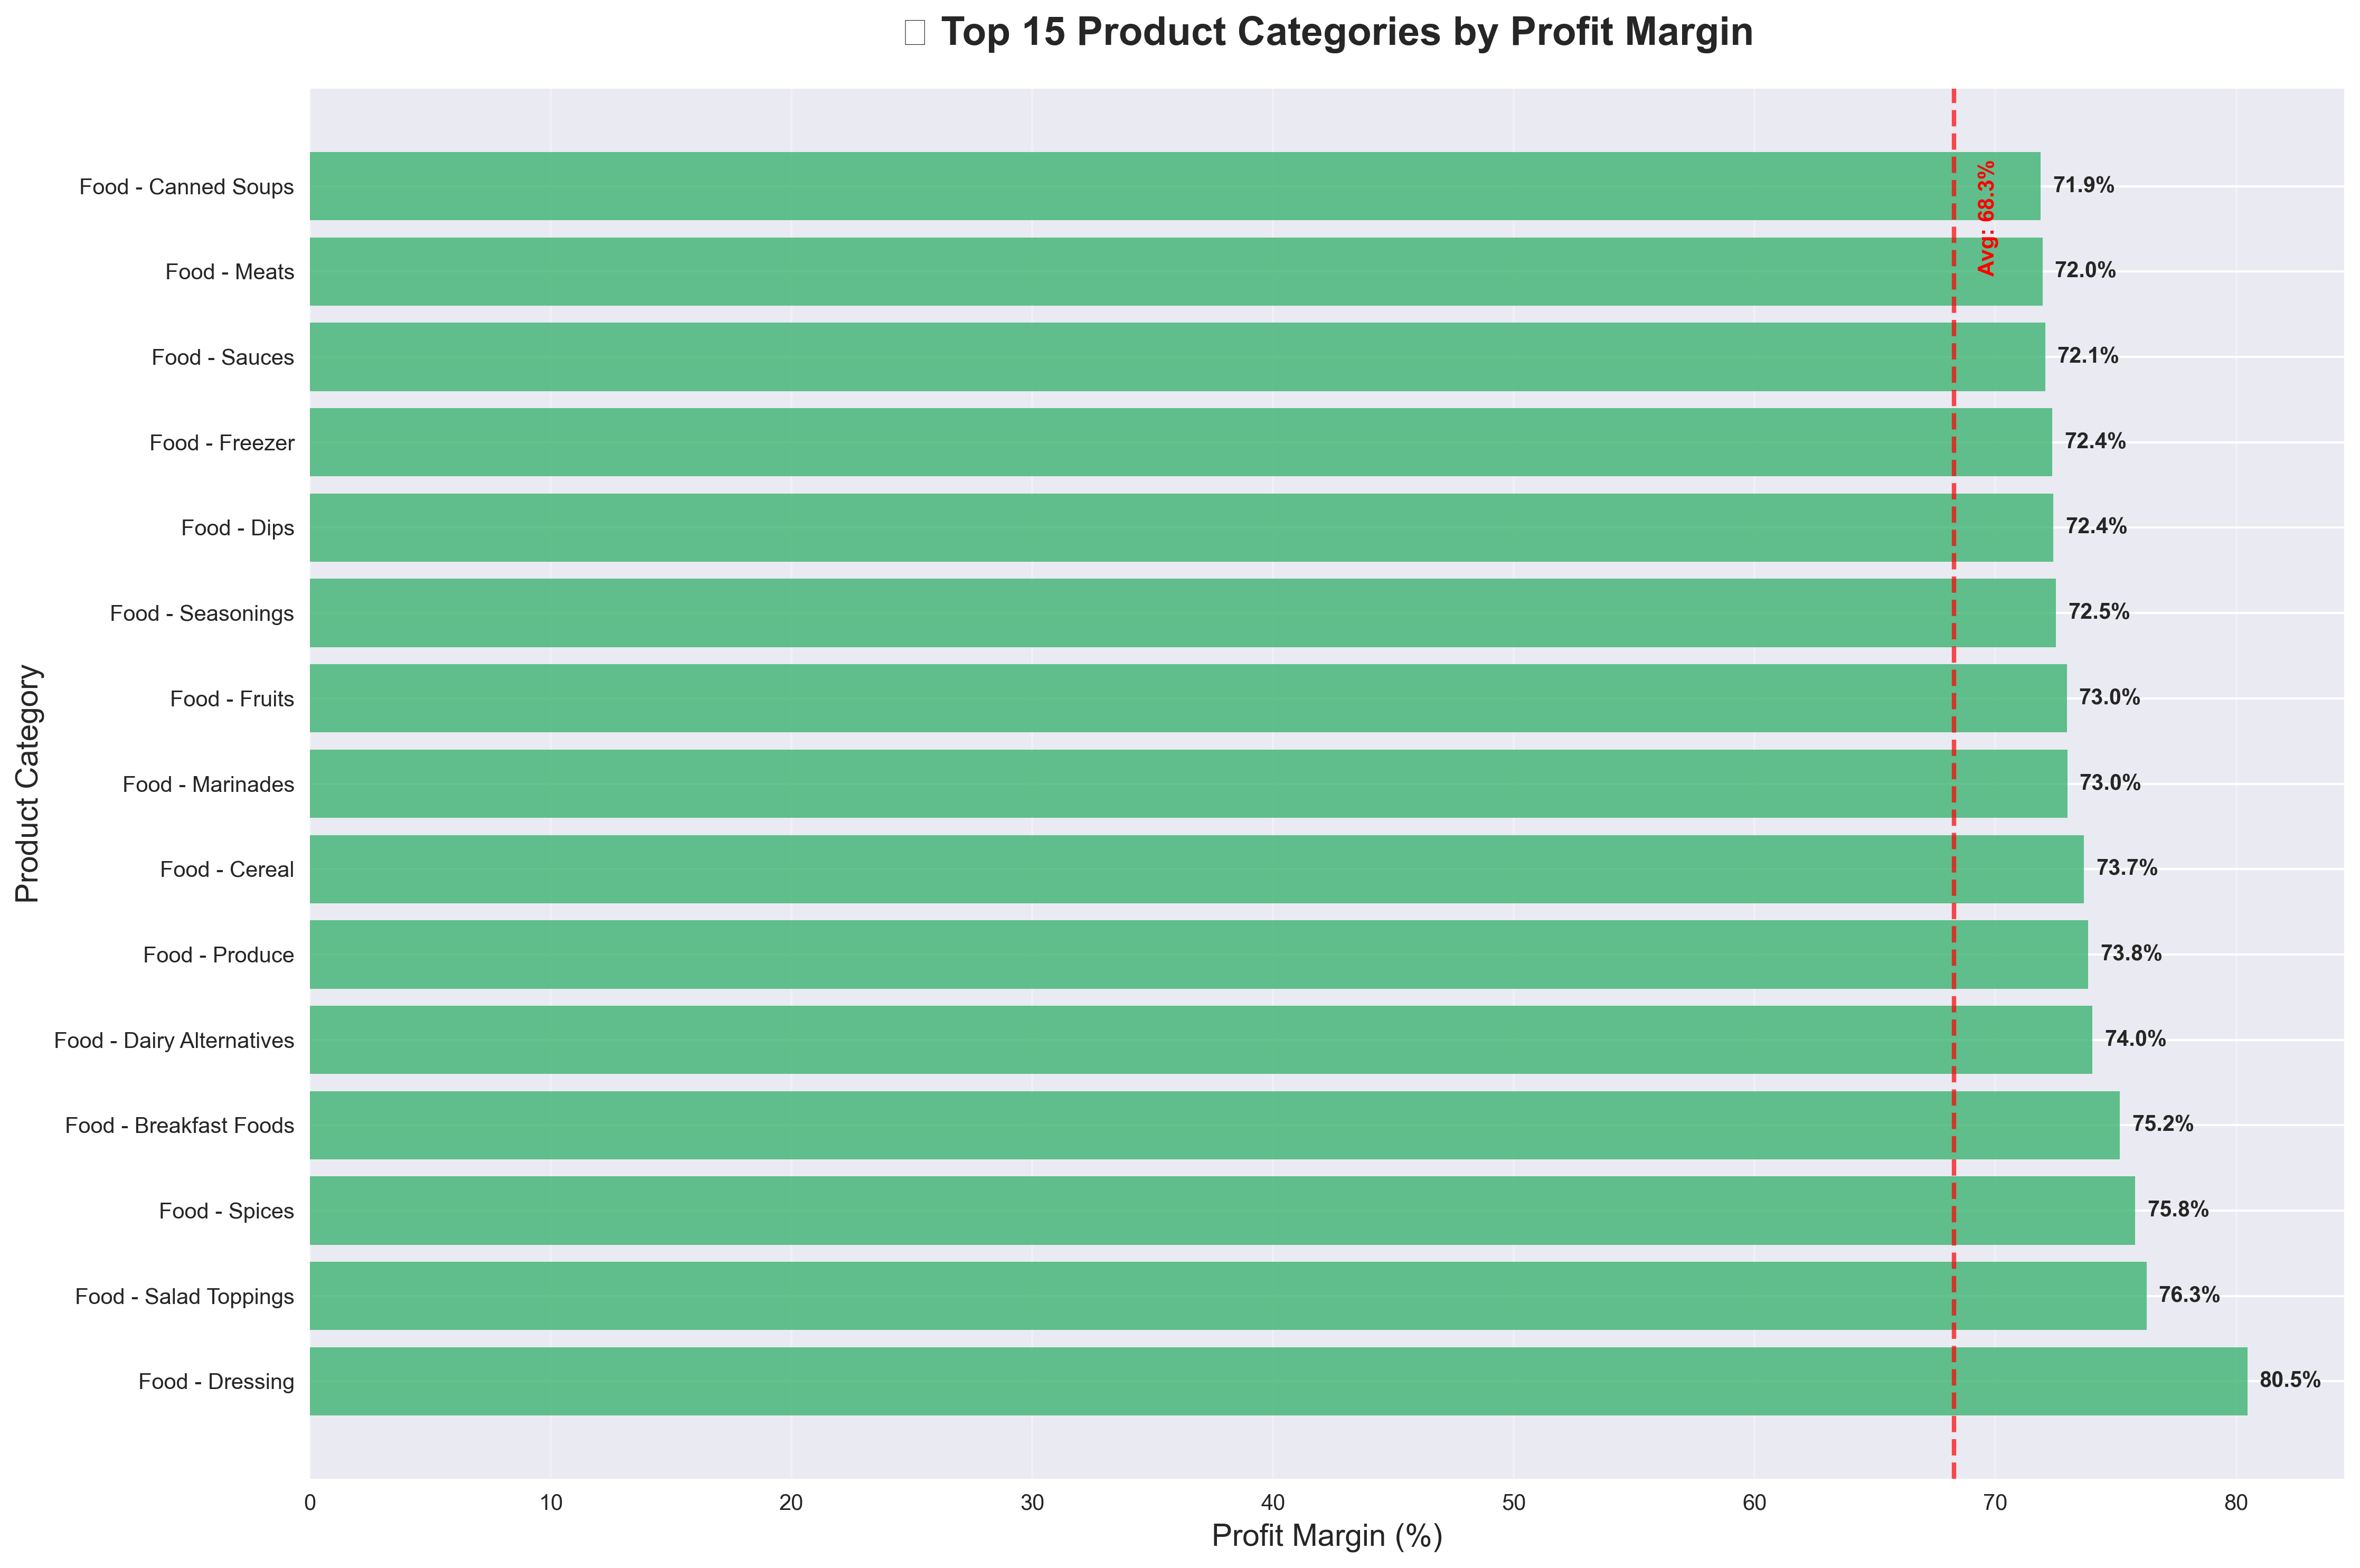

In [236]:
# 5. CATEGORY PROFIT MARGIN ANALYSIS
print("💰 Creating Category Profit Margin Analysis...")

plt.figure(figsize=(15, 10))

# Get top 15 categories by profit margin
top_margin_categories = category_margins.head(15)
categories = [cat[:25] + "..." if len(cat) > 25 else cat for cat in top_margin_categories.index]
margins = top_margin_categories['Profit Margin'].values

bars = plt.barh(range(len(categories)), margins, color='mediumseagreen', alpha=0.8)
plt.title('💡 Top 15 Product Categories by Profit Margin', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Profit Margin (%)', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.yticks(range(len(categories)), categories)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, margin) in enumerate(zip(bars, margins)):
    plt.text(margin + 0.5, i, f'{margin:.1f}%', va='center', fontweight='bold')

# Add average line
avg_margin = df['Profit Margin'].mean()
plt.axvline(avg_margin, color='red', linestyle='--', alpha=0.7, linewidth=2)
plt.text(avg_margin + 1, len(categories) - 2, f'Avg: {avg_margin:.1f}%', 
         color='red', fontweight='bold', rotation=90)

plt.tight_layout()
plt.savefig('diagrams/category_profit_margins.png', dpi=300, bbox_inches='tight')
plt.show()


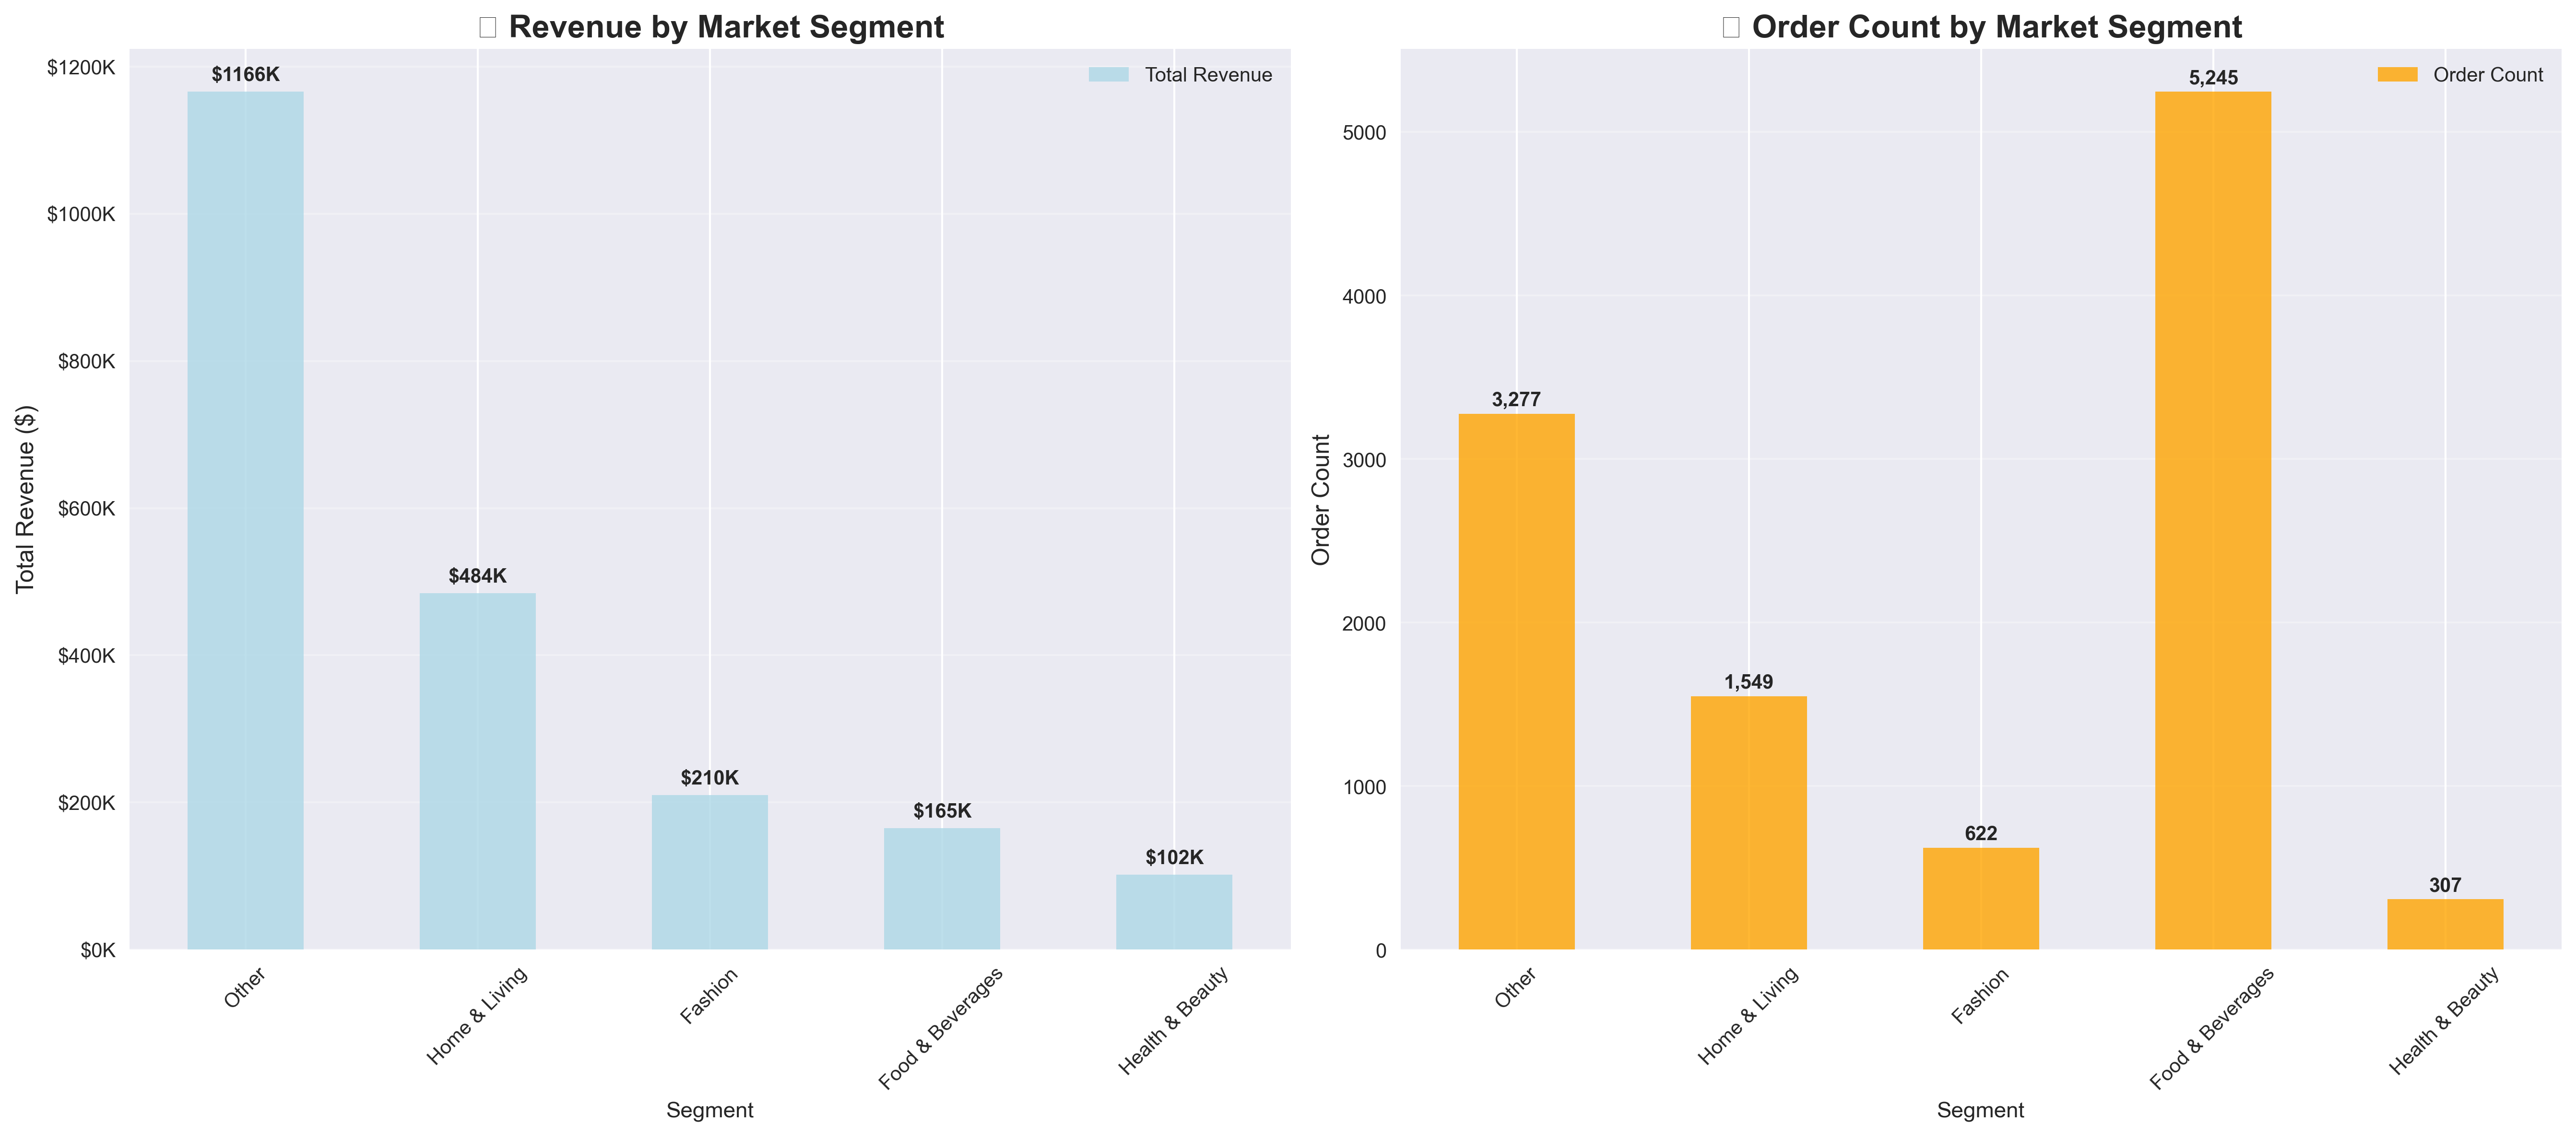

In [237]:
# 6. SEGMENT PERFORMANCE COMPARISON

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Revenue by Segment
segment_summary.plot(y='Total Revenue', kind='bar', ax=ax1, color='lightblue', alpha=0.8)
ax1.set_title('🎯 Revenue by Market Segment', fontsize=16, fontweight='bold')
ax1.set_ylabel('Total Revenue ($)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Add value labels on bars
for i, (segment, revenue) in enumerate(segment_summary['Total Revenue'].items()):
    ax1.text(i, revenue + 15000, f'${revenue/1000:.0f}K', ha='center', fontweight='bold')

# Order Count by Segment
segment_summary.plot(y='Order Count', kind='bar', ax=ax2, color='orange', alpha=0.8)
ax2.set_title('📦 Order Count by Market Segment', fontsize=16, fontweight='bold')
ax2.set_ylabel('Order Count', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (segment, orders) in enumerate(segment_summary['Order Count'].items()):
    ax2.text(i, orders + 50, f'{orders:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('diagrams/segment_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
